In [6]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

/home/edavenport/miniconda3/envs/mitgcm_analysis/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40699 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:42959' processes=12 threads=96, memory=0.98 TiB>

In [7]:
## Read in adjoint sensitivity diagnostics for a transect from 0-60m at 140W (1S to 1N) 
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import xarray as xr
from xmitgcm import open_mdsdataset
import numpy as np
import warnings
# warnings.filterwarnings("ignore")

data_dir = '/data/SO3/edavenport/tpose6/sep2012/sens_EUC_60to160m/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(0,itPerFile*num_diags,itPerFile) # adjoint sensitivity will start at 0 and go to 1 lag (1 interval less than total number of timesteps)

# when prefix is not set, this will read all available files 
# have to ignore unkown vars until we have an available_diagnostics.log that includes ADJrhoinsitu
tpose_ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,ref_date='2012-09-01',delta_t=1200,ignore_unknown_vars=True)
tpose_ds['XC'] = tpose_ds.XC.astype(float)
tpose_ds['YC'] = tpose_ds.YC.astype(float)
tpose_ds['Z'] = tpose_ds.Z.astype(float)
tpose_ds['XG'] = tpose_ds.XG.astype(float)
tpose_ds['YG'] = tpose_ds.YG.astype(float)



In [33]:
tpose_ds.ADJatemp

<xarray.DataArray 'ADJatemp' (time: 122, YC: 336, XC: 1128)> Size: 185MB
dask.array<concatenate, shape=(122, 336, 1128), dtype=float32, chunksize=(1, 336, 1128), chunktype=numpy.ndarray>
Coordinates:
    iter     (time) int64 976B dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) datetime64[ns] 976B 2012-09-01 2012-09-02 ... 2012-12-31
  * XC       (XC) float64 9kB 104.1 104.2 104.4 104.6 ... 291.6 291.8 291.9
  * YC       (YC) float64 3kB -25.92 -25.75 -25.58 -25.42 ... 29.58 29.75 29.92
    rA       (YC, XC) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    Depth    (YC, XC) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dxF      (YC, XC) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dyF      (YC, XC) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
Attributes:
    standard_name:  ADJatemp
    long_name:      dJ/datemp: Sensitivity to atmospheric surface temperature
    units:          dJ/K

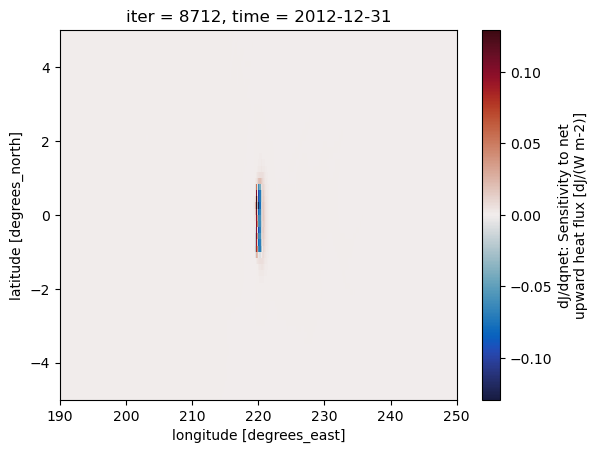

In [34]:
tpose_ds.ADJqnet[-1].sel(XC=slice(190,250),YC=slice(-5,5)).plot(x='XC', y='YC',cmap=cmo.balance)

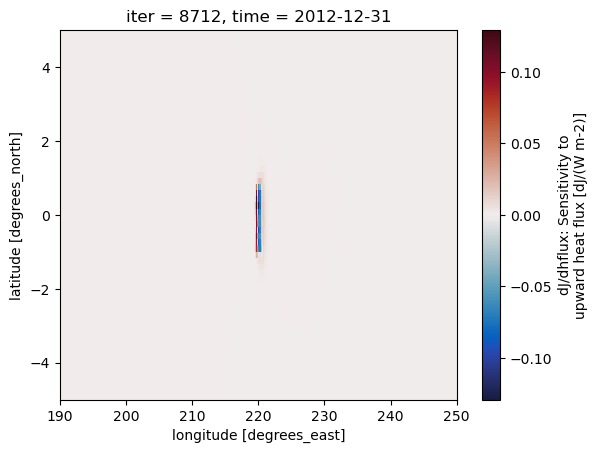

In [35]:
tpose_ds.ADJhflux[-1].sel(XC=slice(190,250),YC=slice(-5,5)).plot(x='XC', y='YC',cmap=cmo.balance)

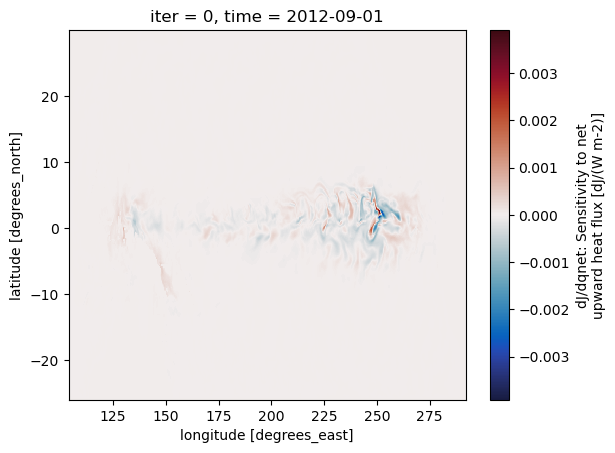

In [36]:
tpose_ds.ADJqnet[0].plot(x='XC', y='YC',cmap=cmo.balance)

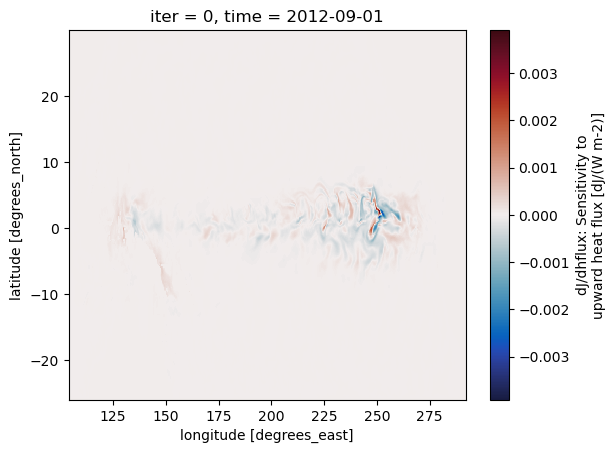

In [37]:
tpose_ds.ADJhflux[0].plot(x='XC', y='YC',cmap=cmo.balance)

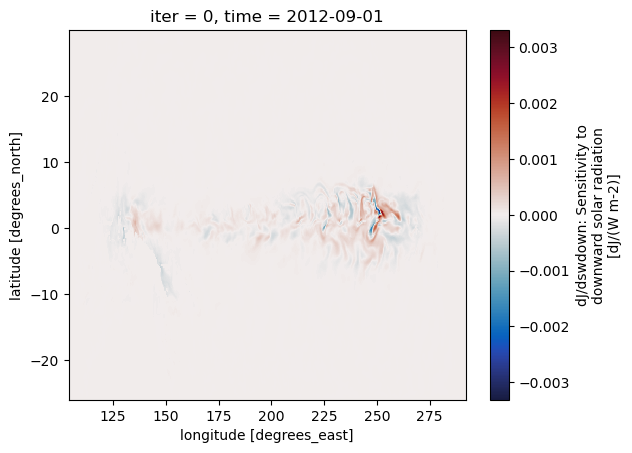

In [38]:
tpose_ds.ADJswdown[0].plot(x='XC', y='YC',cmap=cmo.balance)

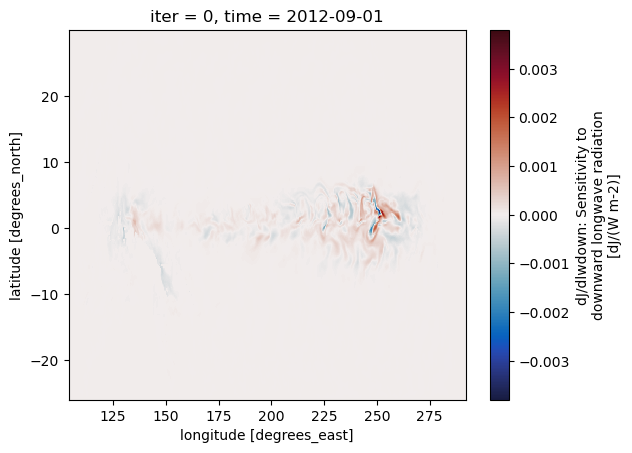

In [39]:
tpose_ds.ADJlwdown[0].plot(x='XC', y='YC',cmap=cmo.balance)

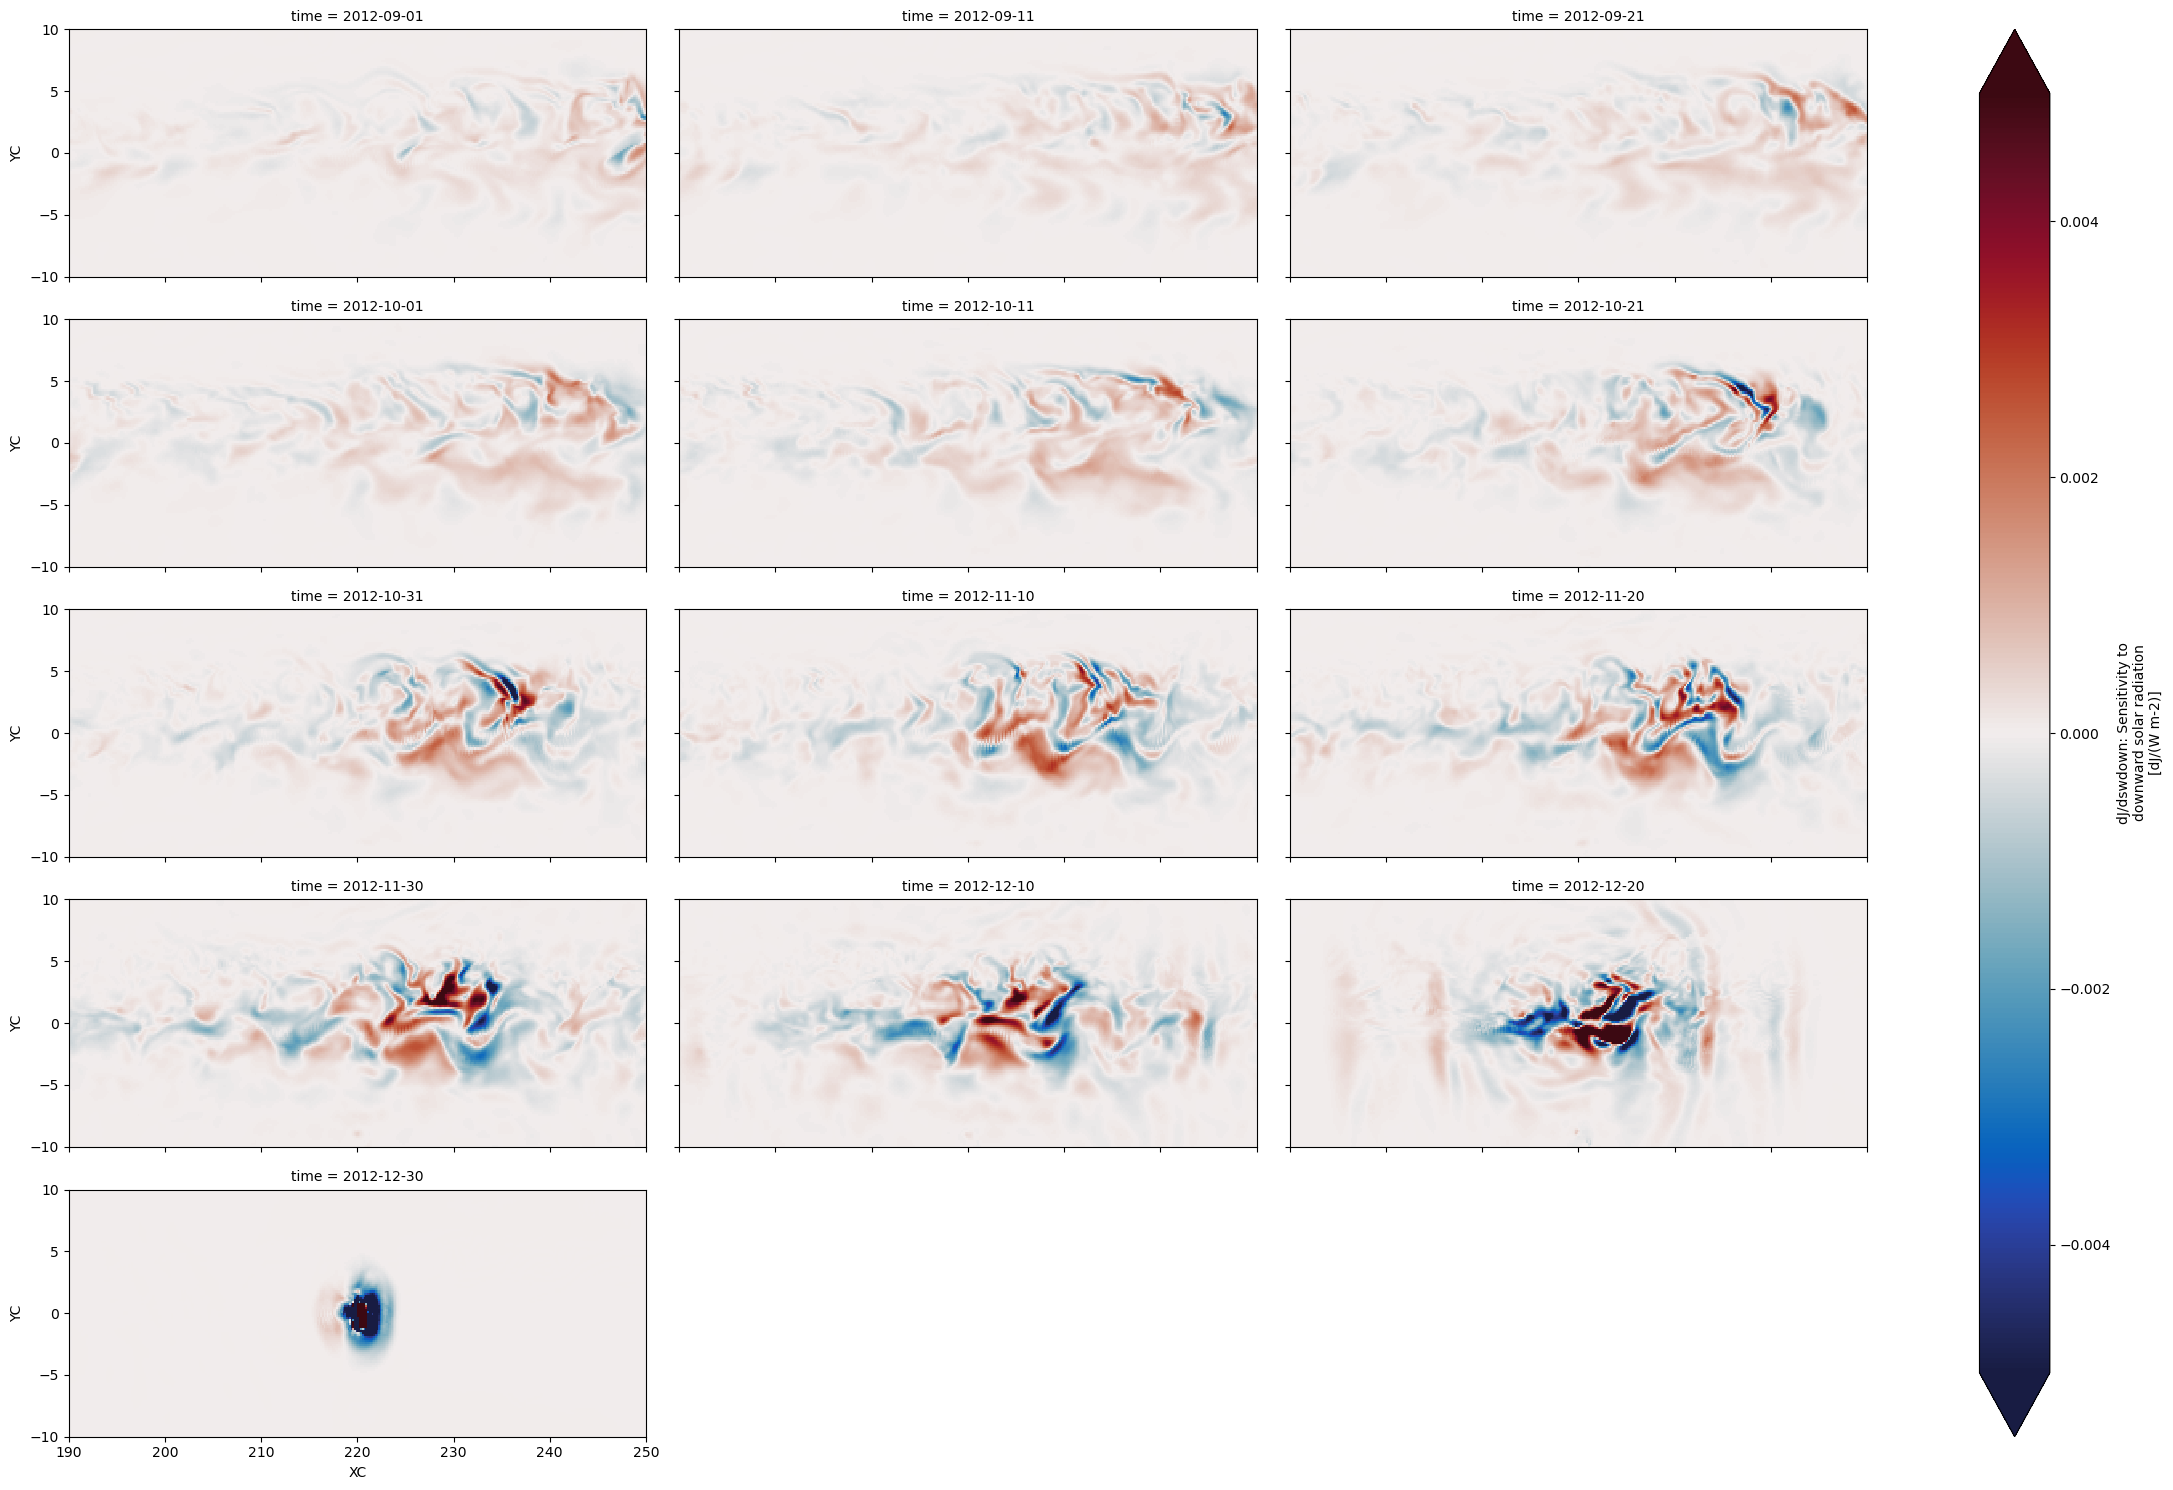

In [57]:
tpose_ds.ADJswdown[::10].sel(XC=slice(190,250),YC=slice(-10,10)).plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.005, vmax=0.005, robust=True)

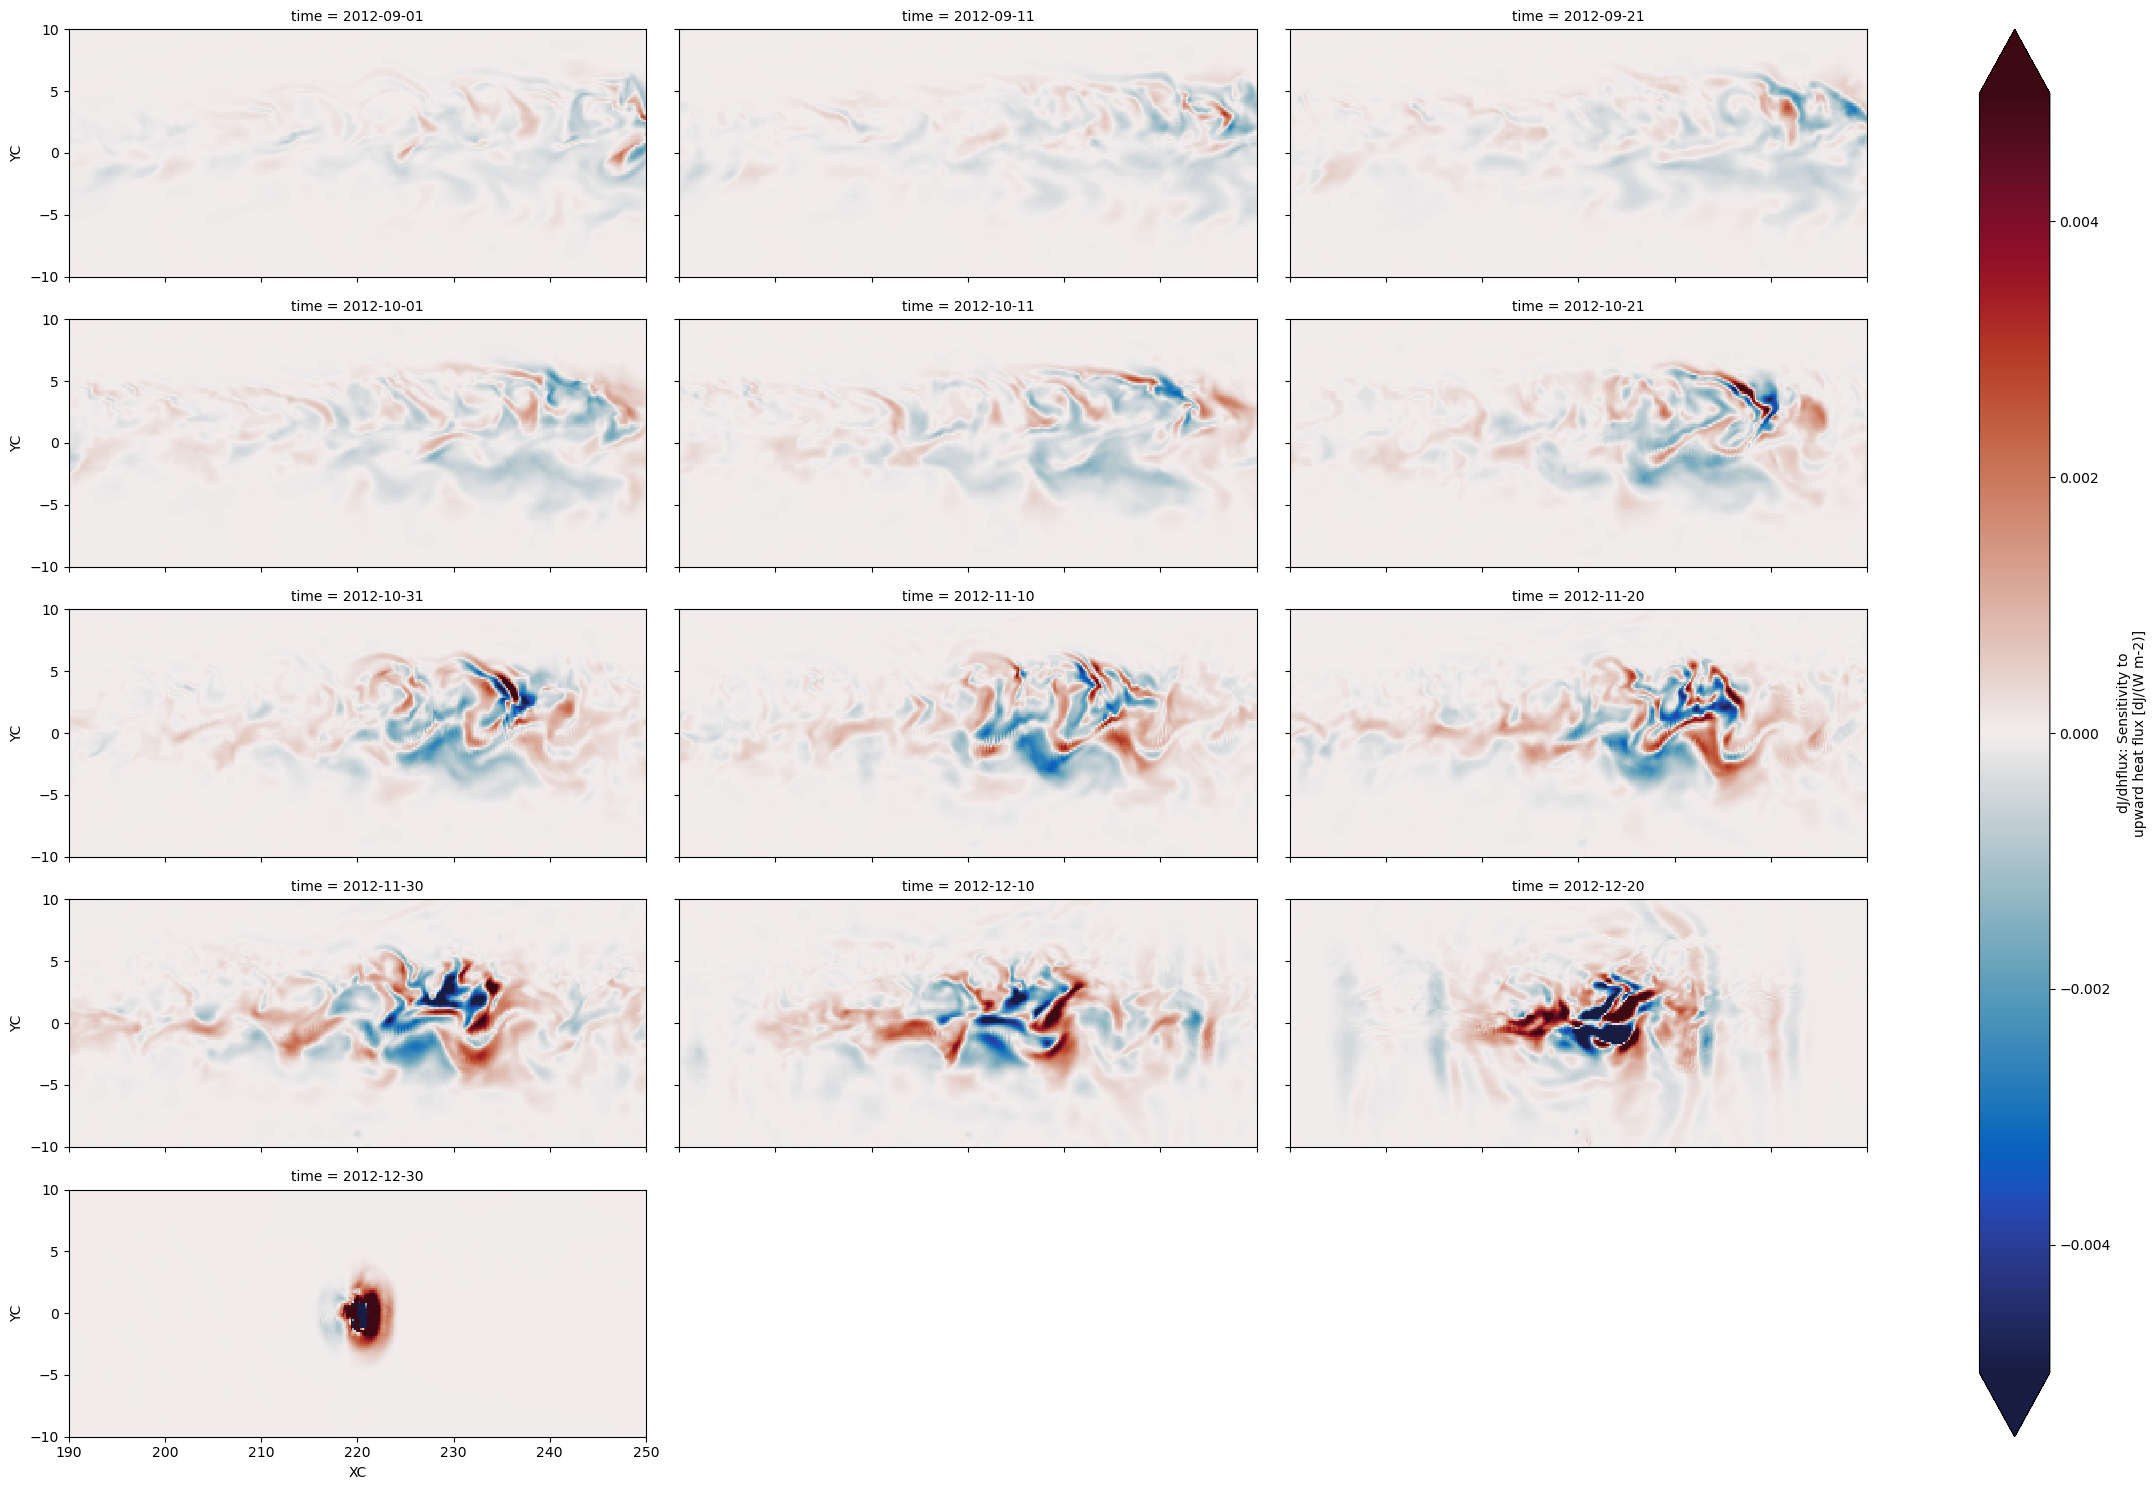

In [60]:
tpose_ds.ADJhflux[::10].sel(XC=slice(190,250),YC=slice(-10,10)).plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.005, vmax=0.005, robust=True)

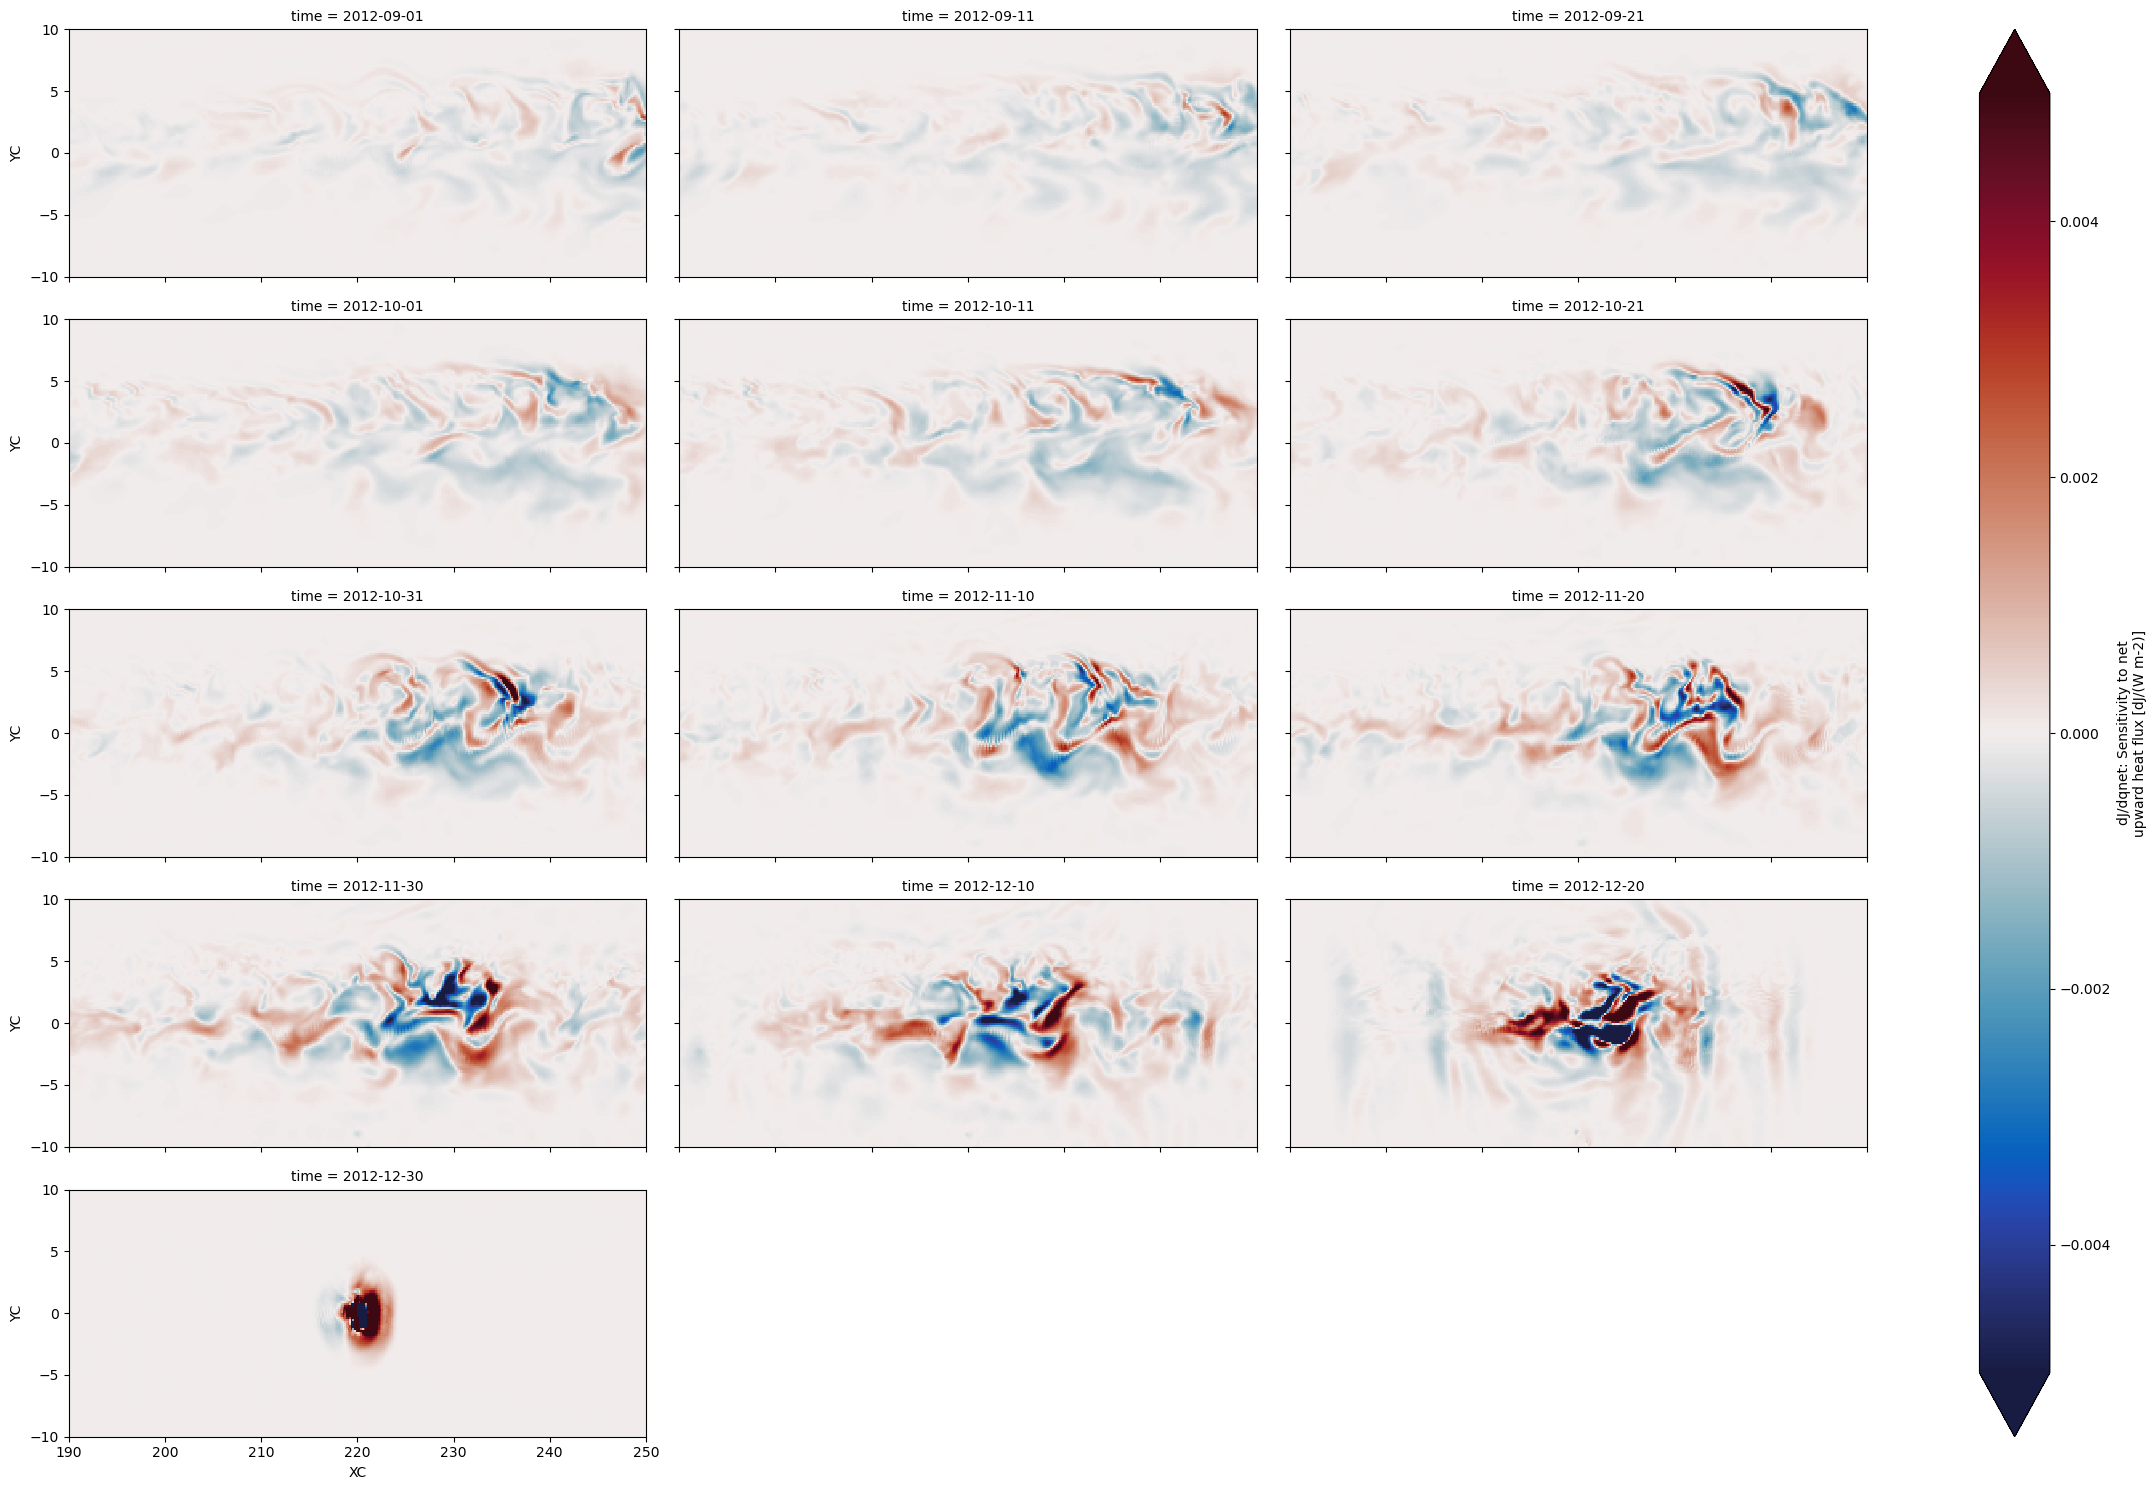

In [61]:
tpose_ds.ADJqnet[::10].sel(XC=slice(190,250),YC=slice(-10,10)).plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.005, vmax=0.005, robust=True)

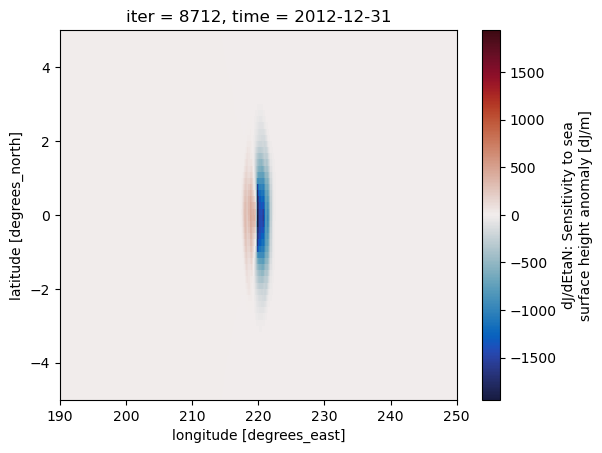

In [43]:
tpose_ds.ADJetan[-1].sel(XC=slice(190,250),YC=slice(-5,5)).plot(x='XC', y='YC',cmap=cmo.balance)

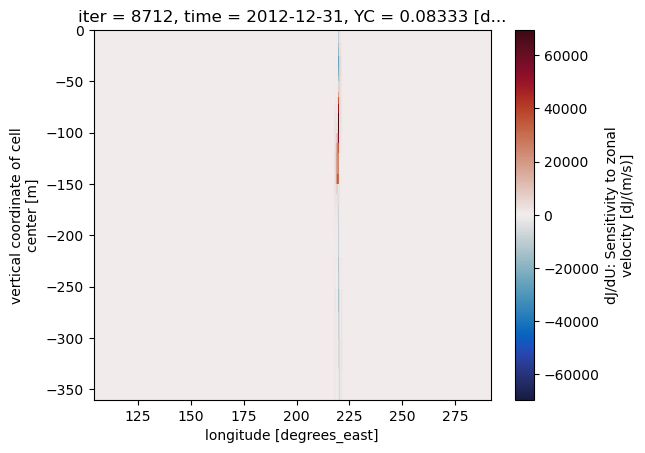

In [44]:
tpose_ds.ADJuvel[-1,:40].sel(YC=[0.0],method='nearest').plot(x='XG', y='Z', cmap=cmo.balance)

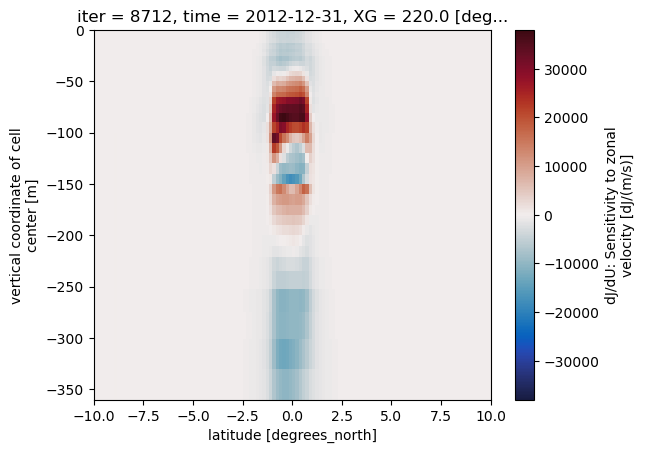

In [45]:
tpose_ds.ADJuvel[-1,:40].sel(XG=[220.0],method='nearest').sel(YC=slice(-10,10)).plot(x='YC', y='Z', cmap=cmo.balance)

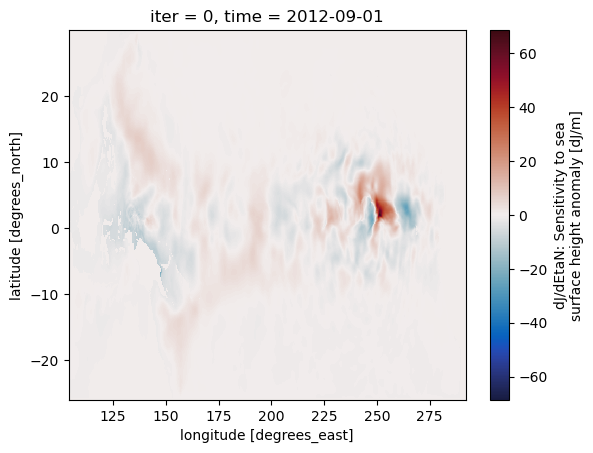

In [46]:
tpose_ds.ADJetan[0].plot(x='XC', y='YC',cmap=cmo.balance)

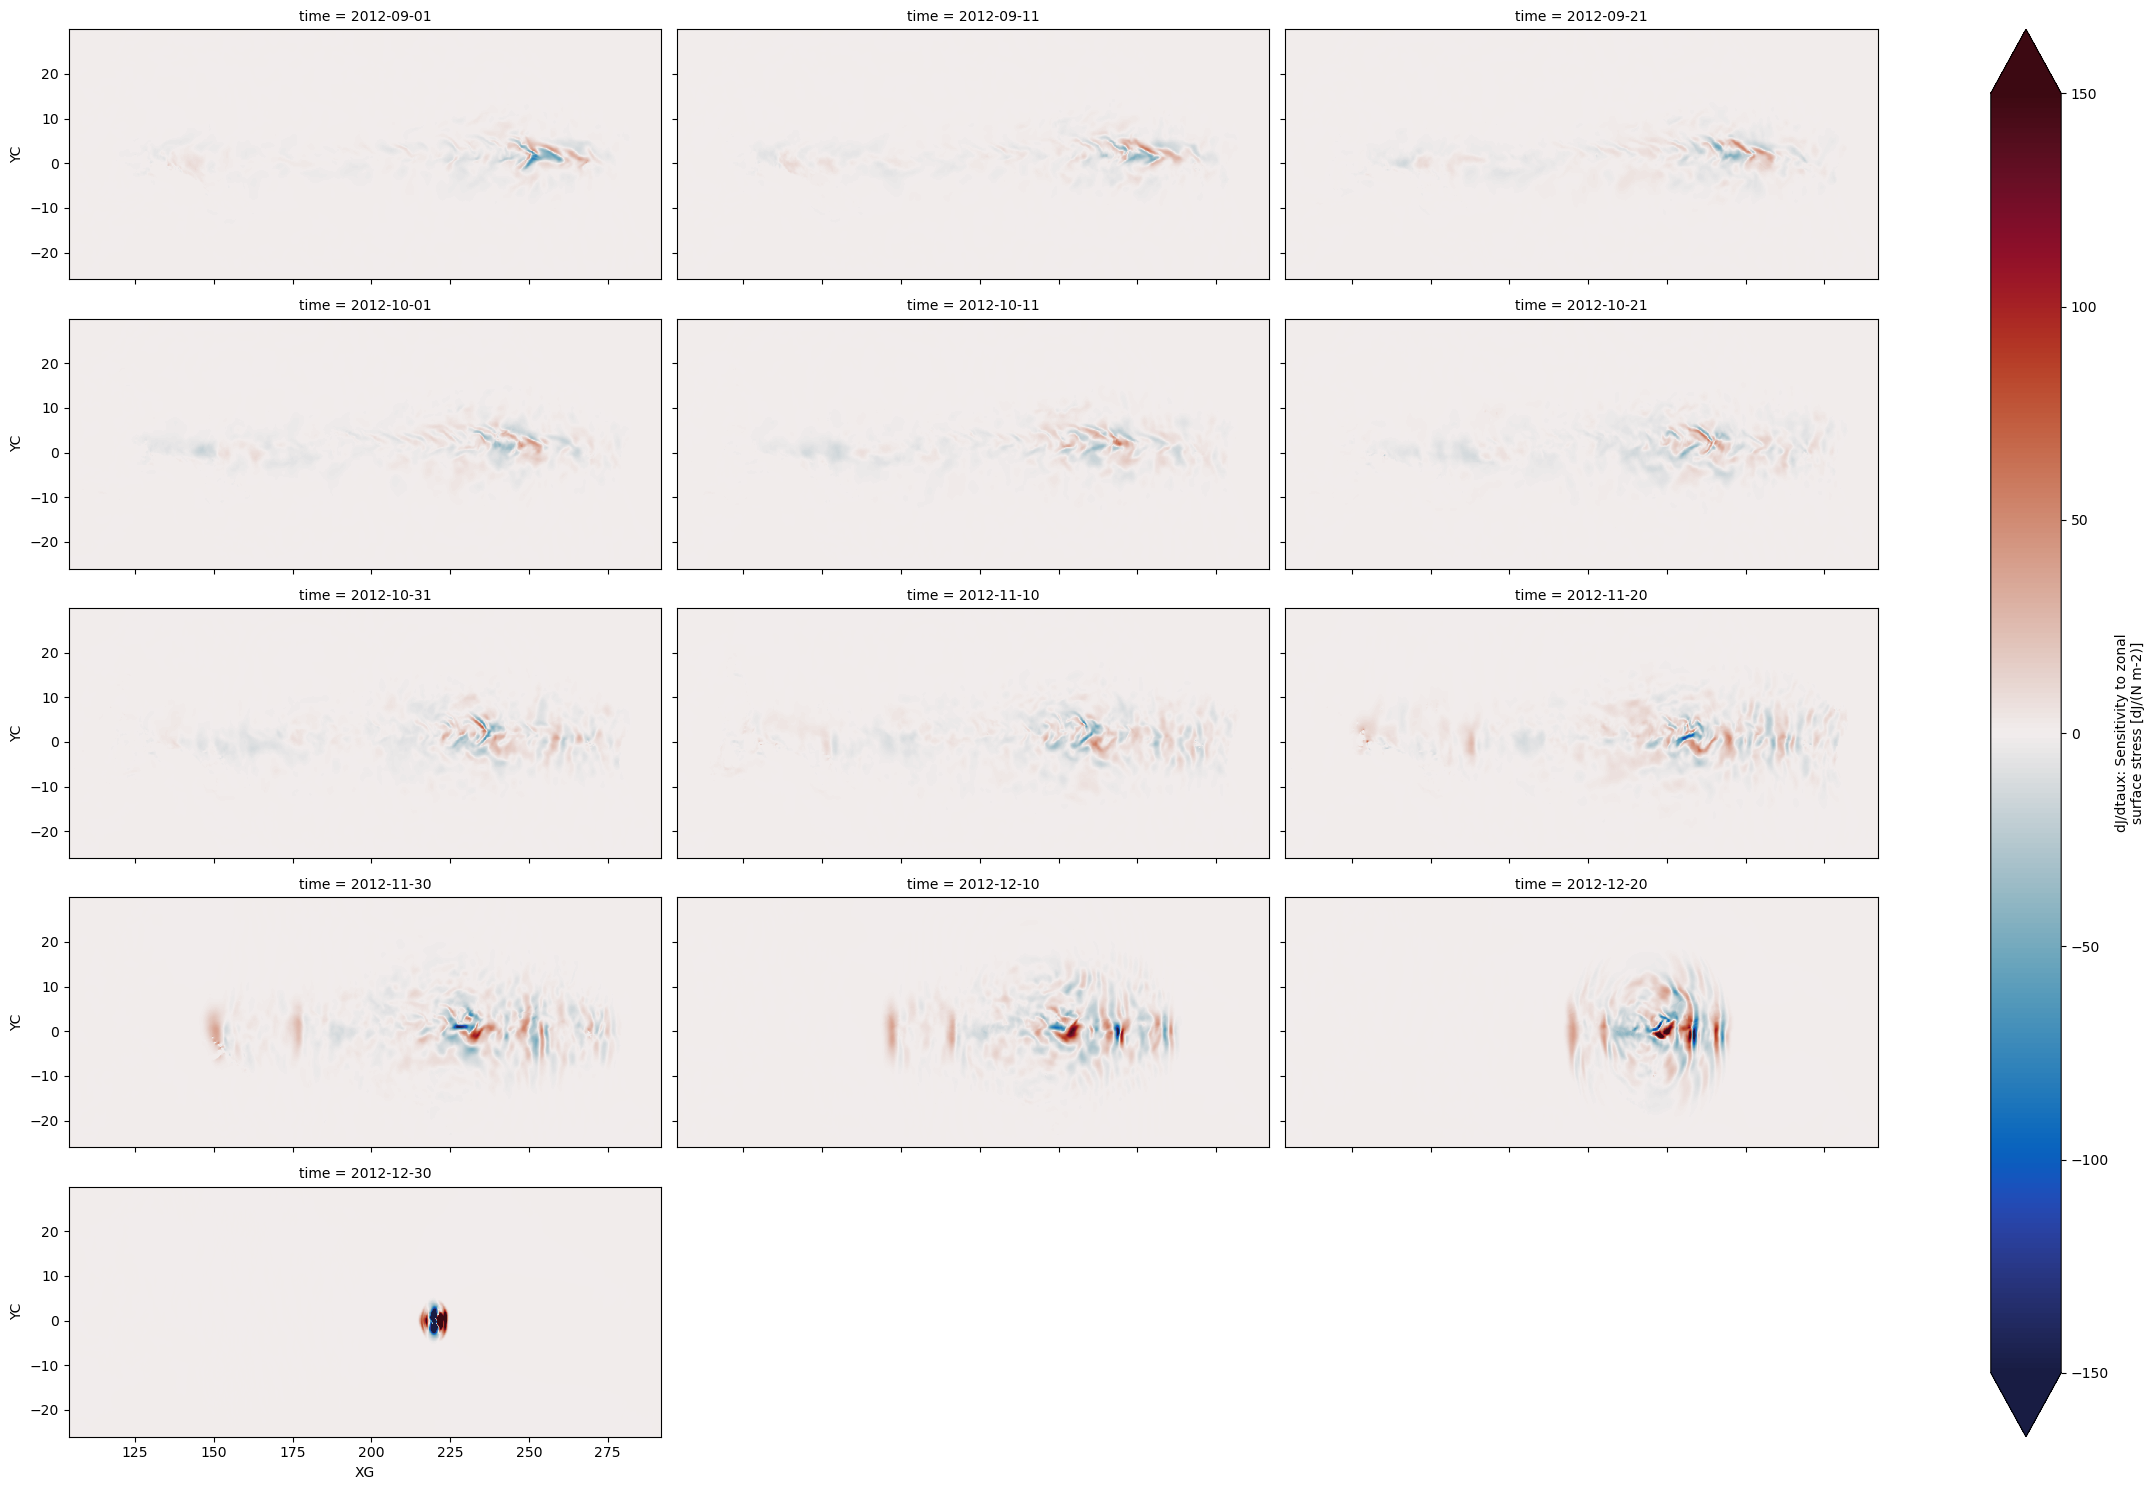

In [47]:
tpose_ds.ADJtaux[::10].plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-150, vmax=150,cmap=cmo.balance)

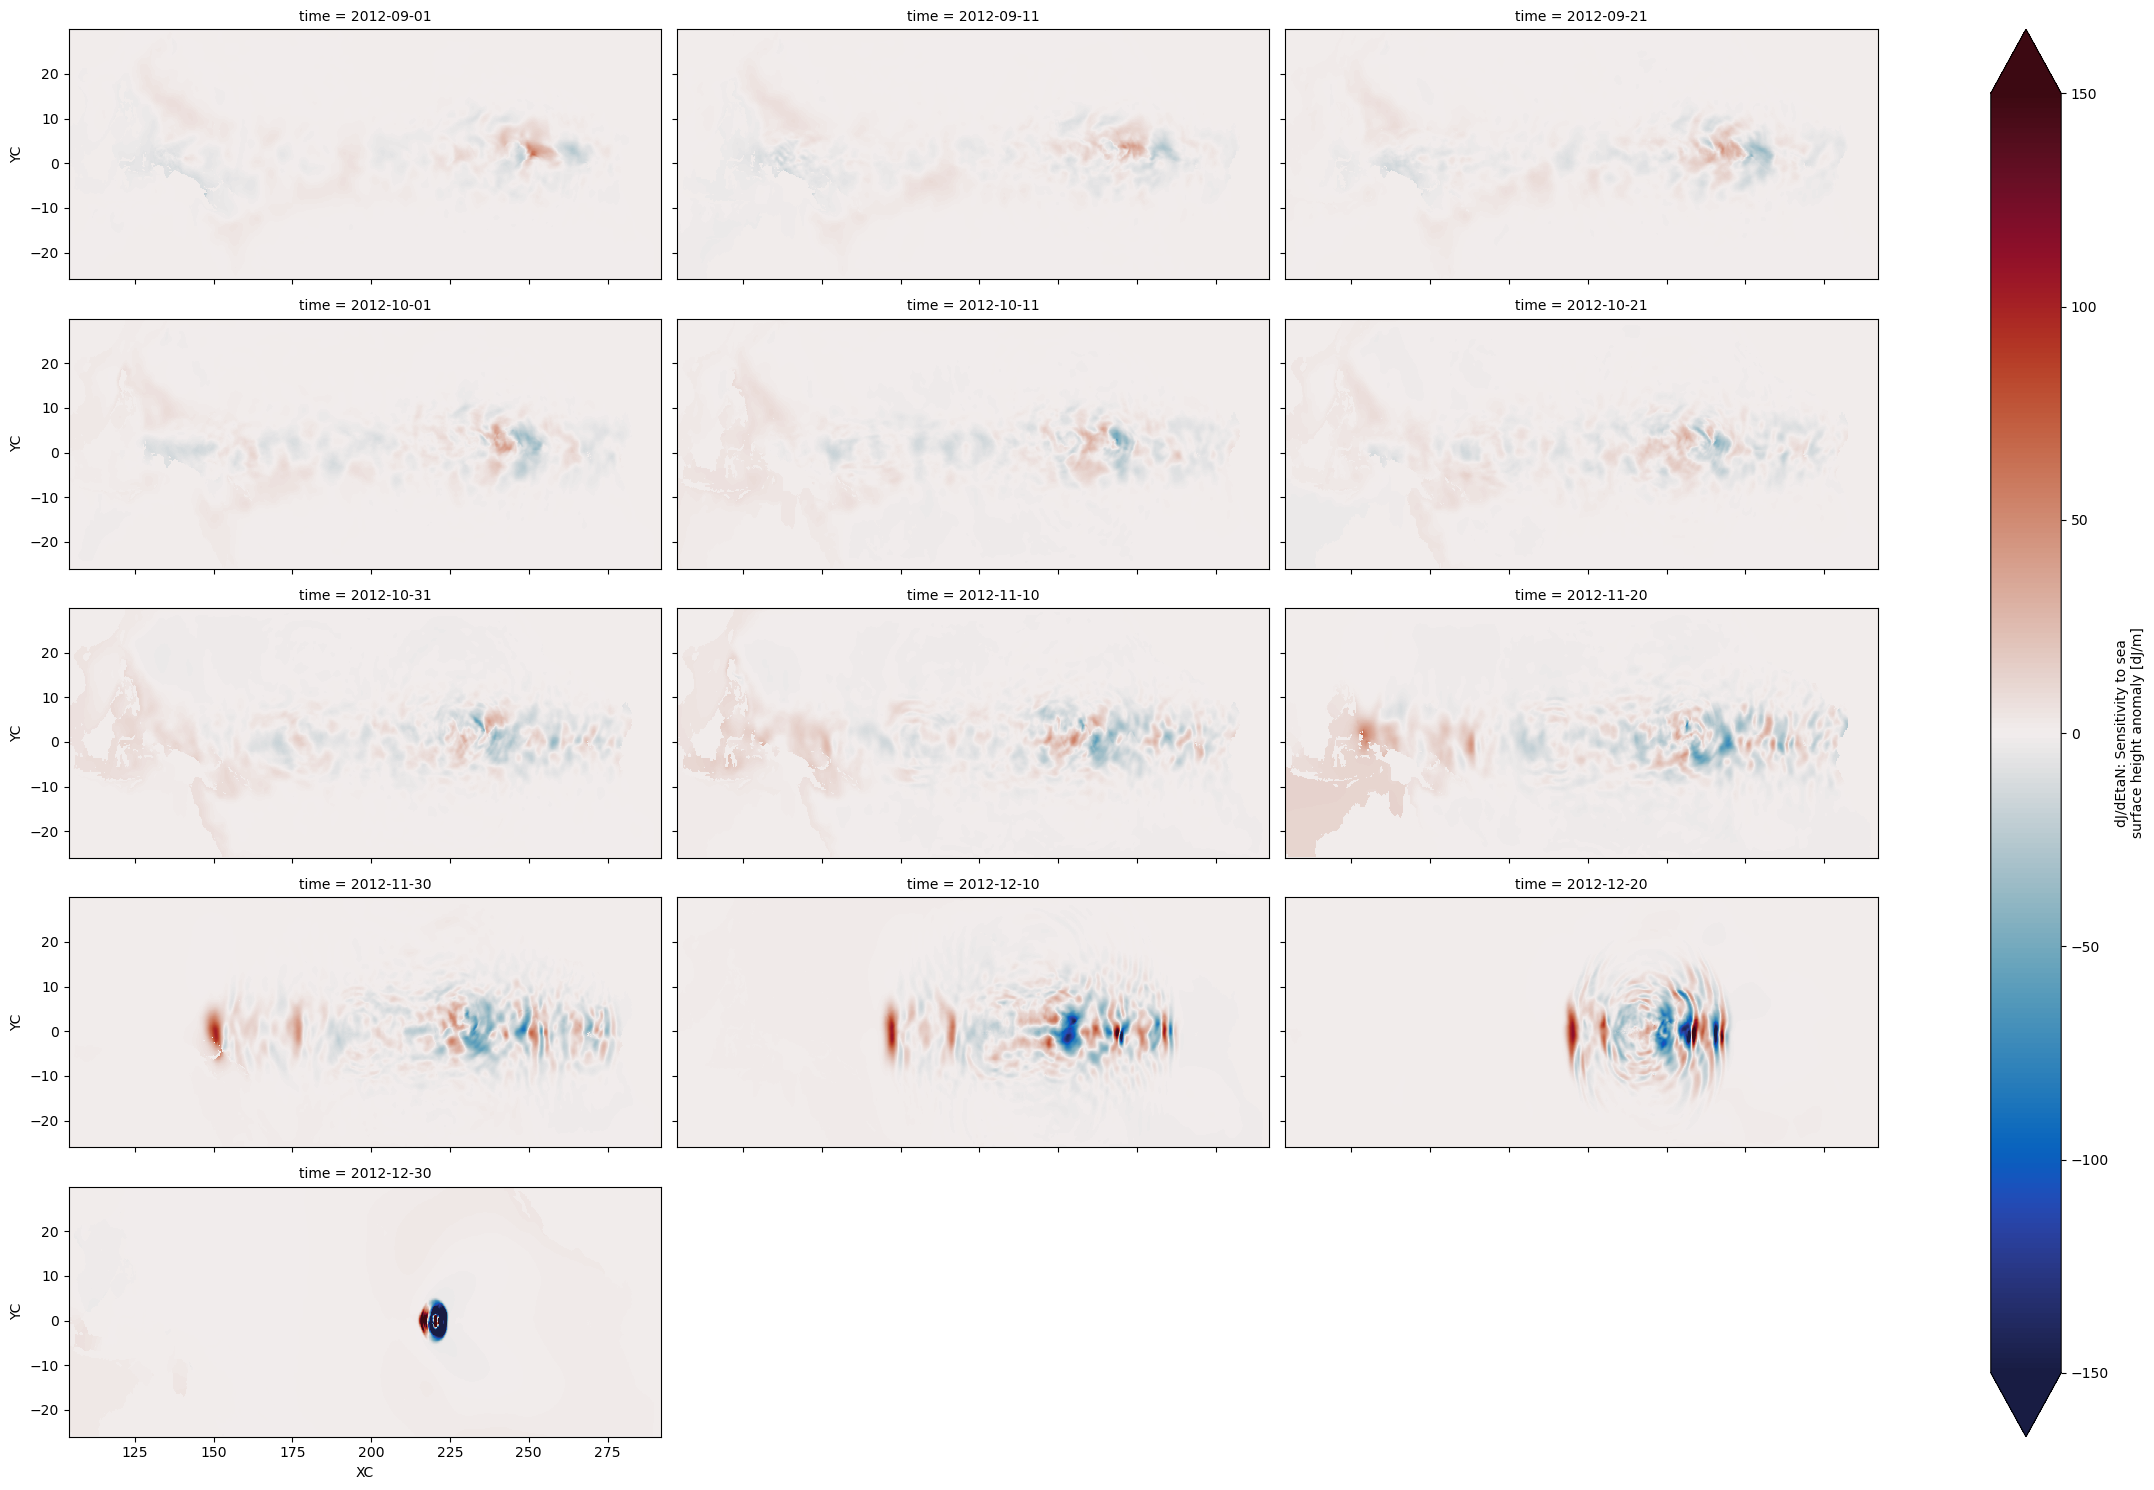

In [48]:
tpose_ds.ADJetan[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-150, vmax=150,cmap=cmo.balance)

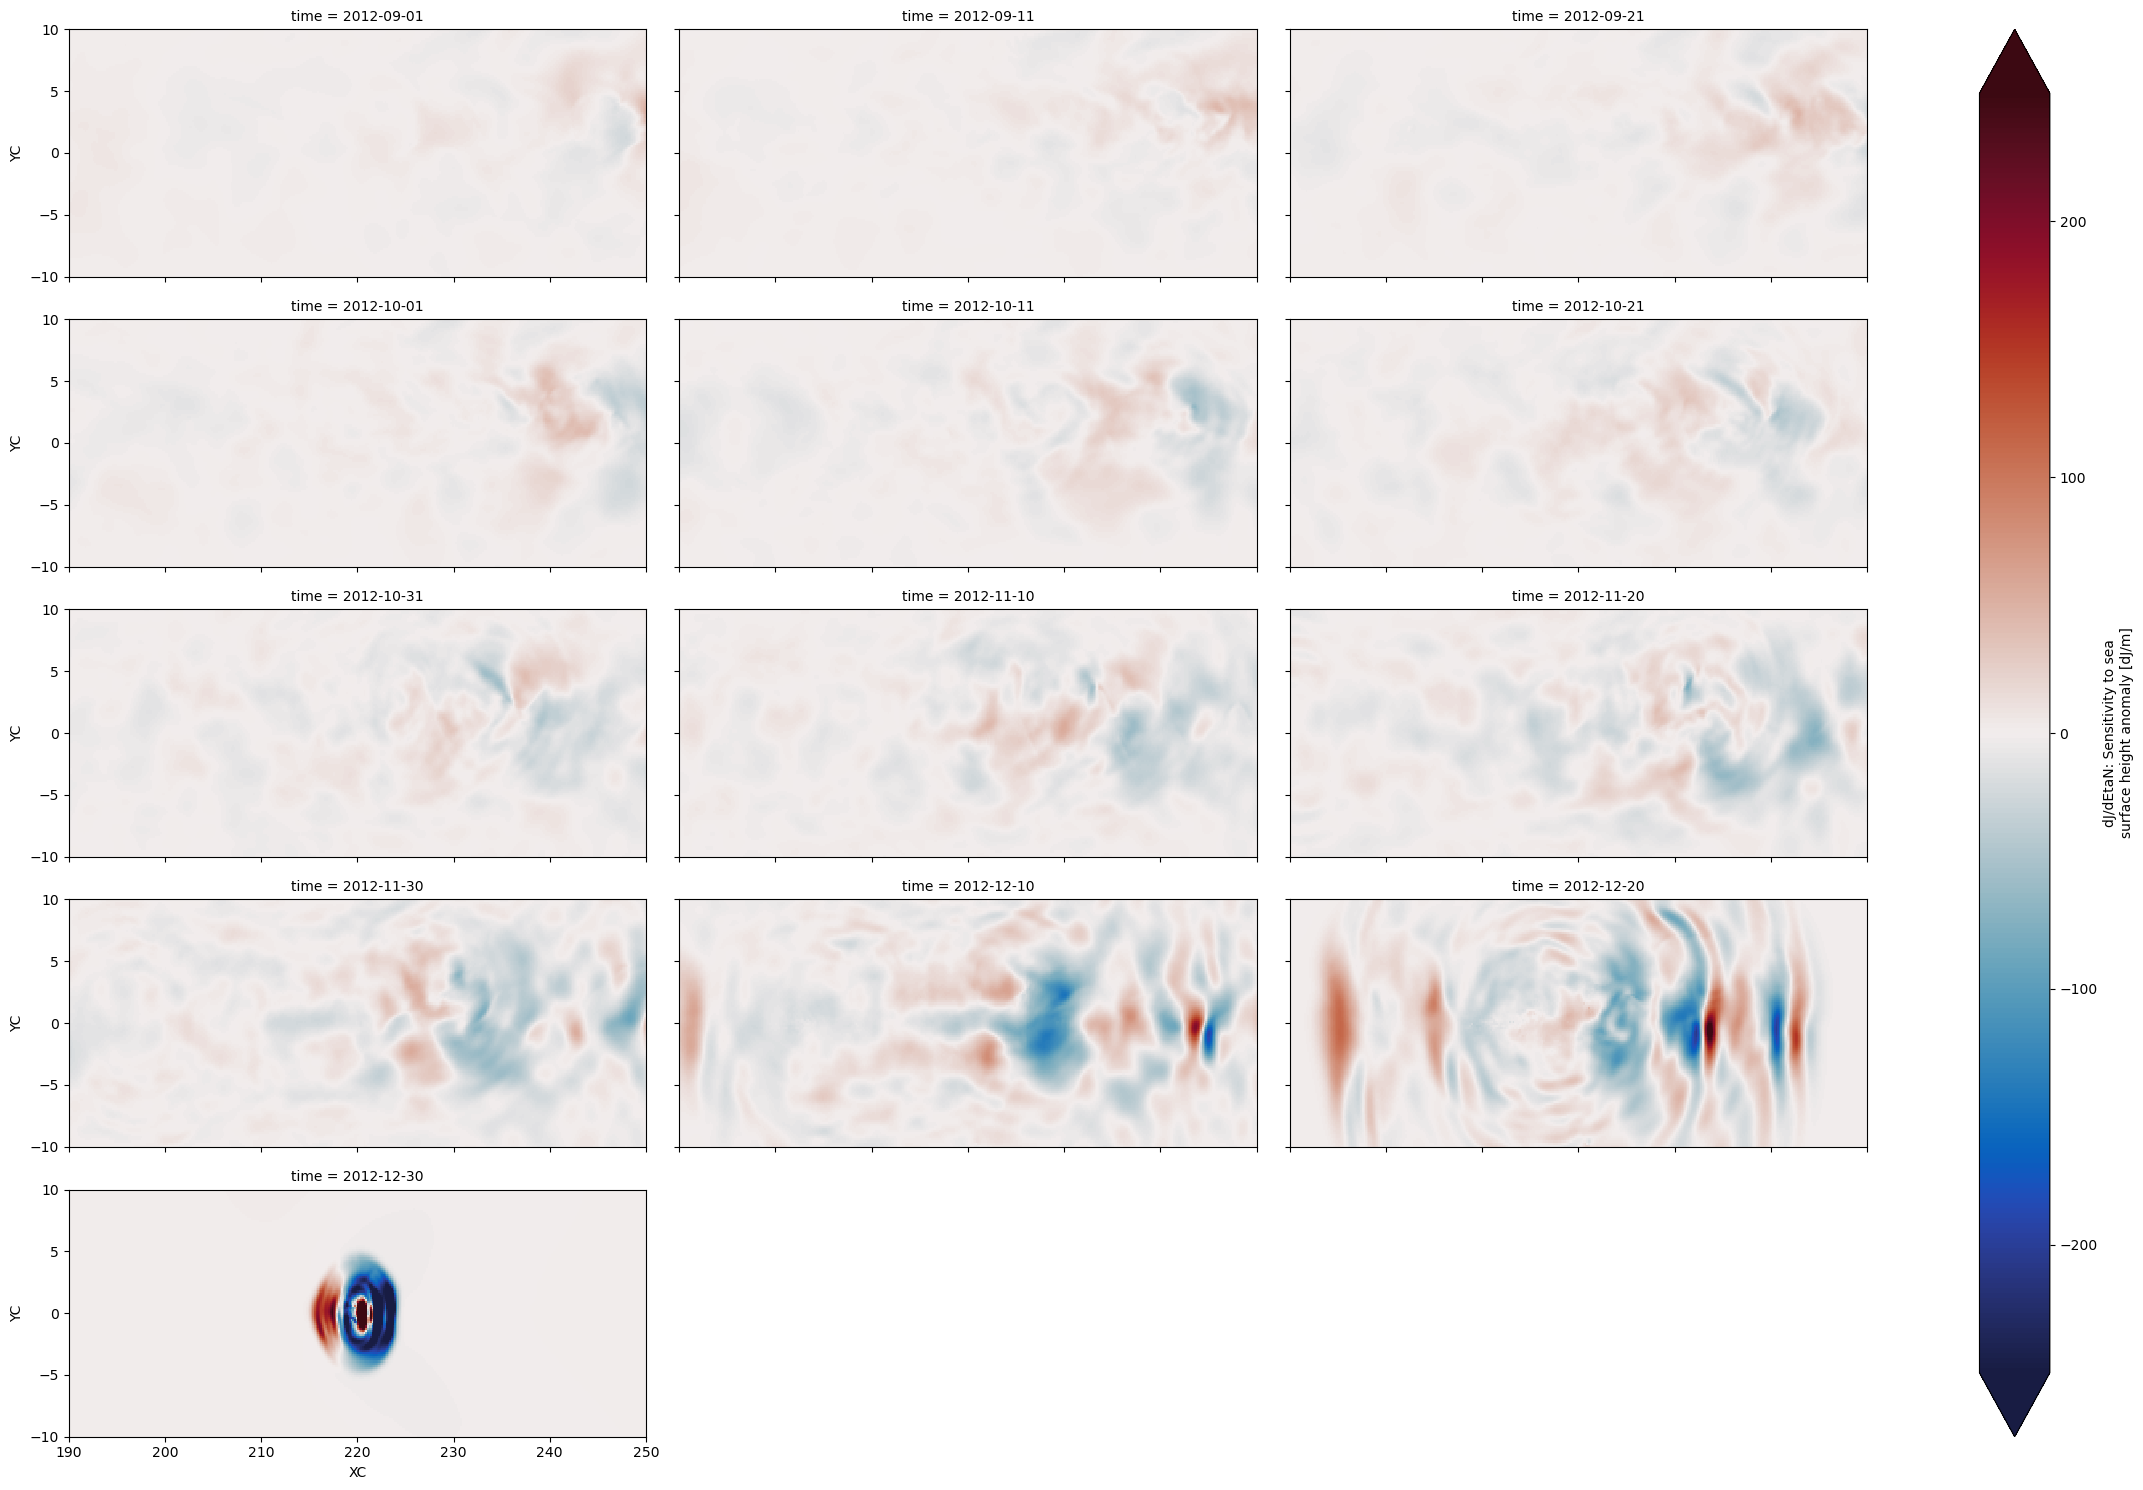

In [49]:
tpose_ds.ADJetan.sel(XC=slice(190,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-250, vmax=250,cmap=cmo.balance)

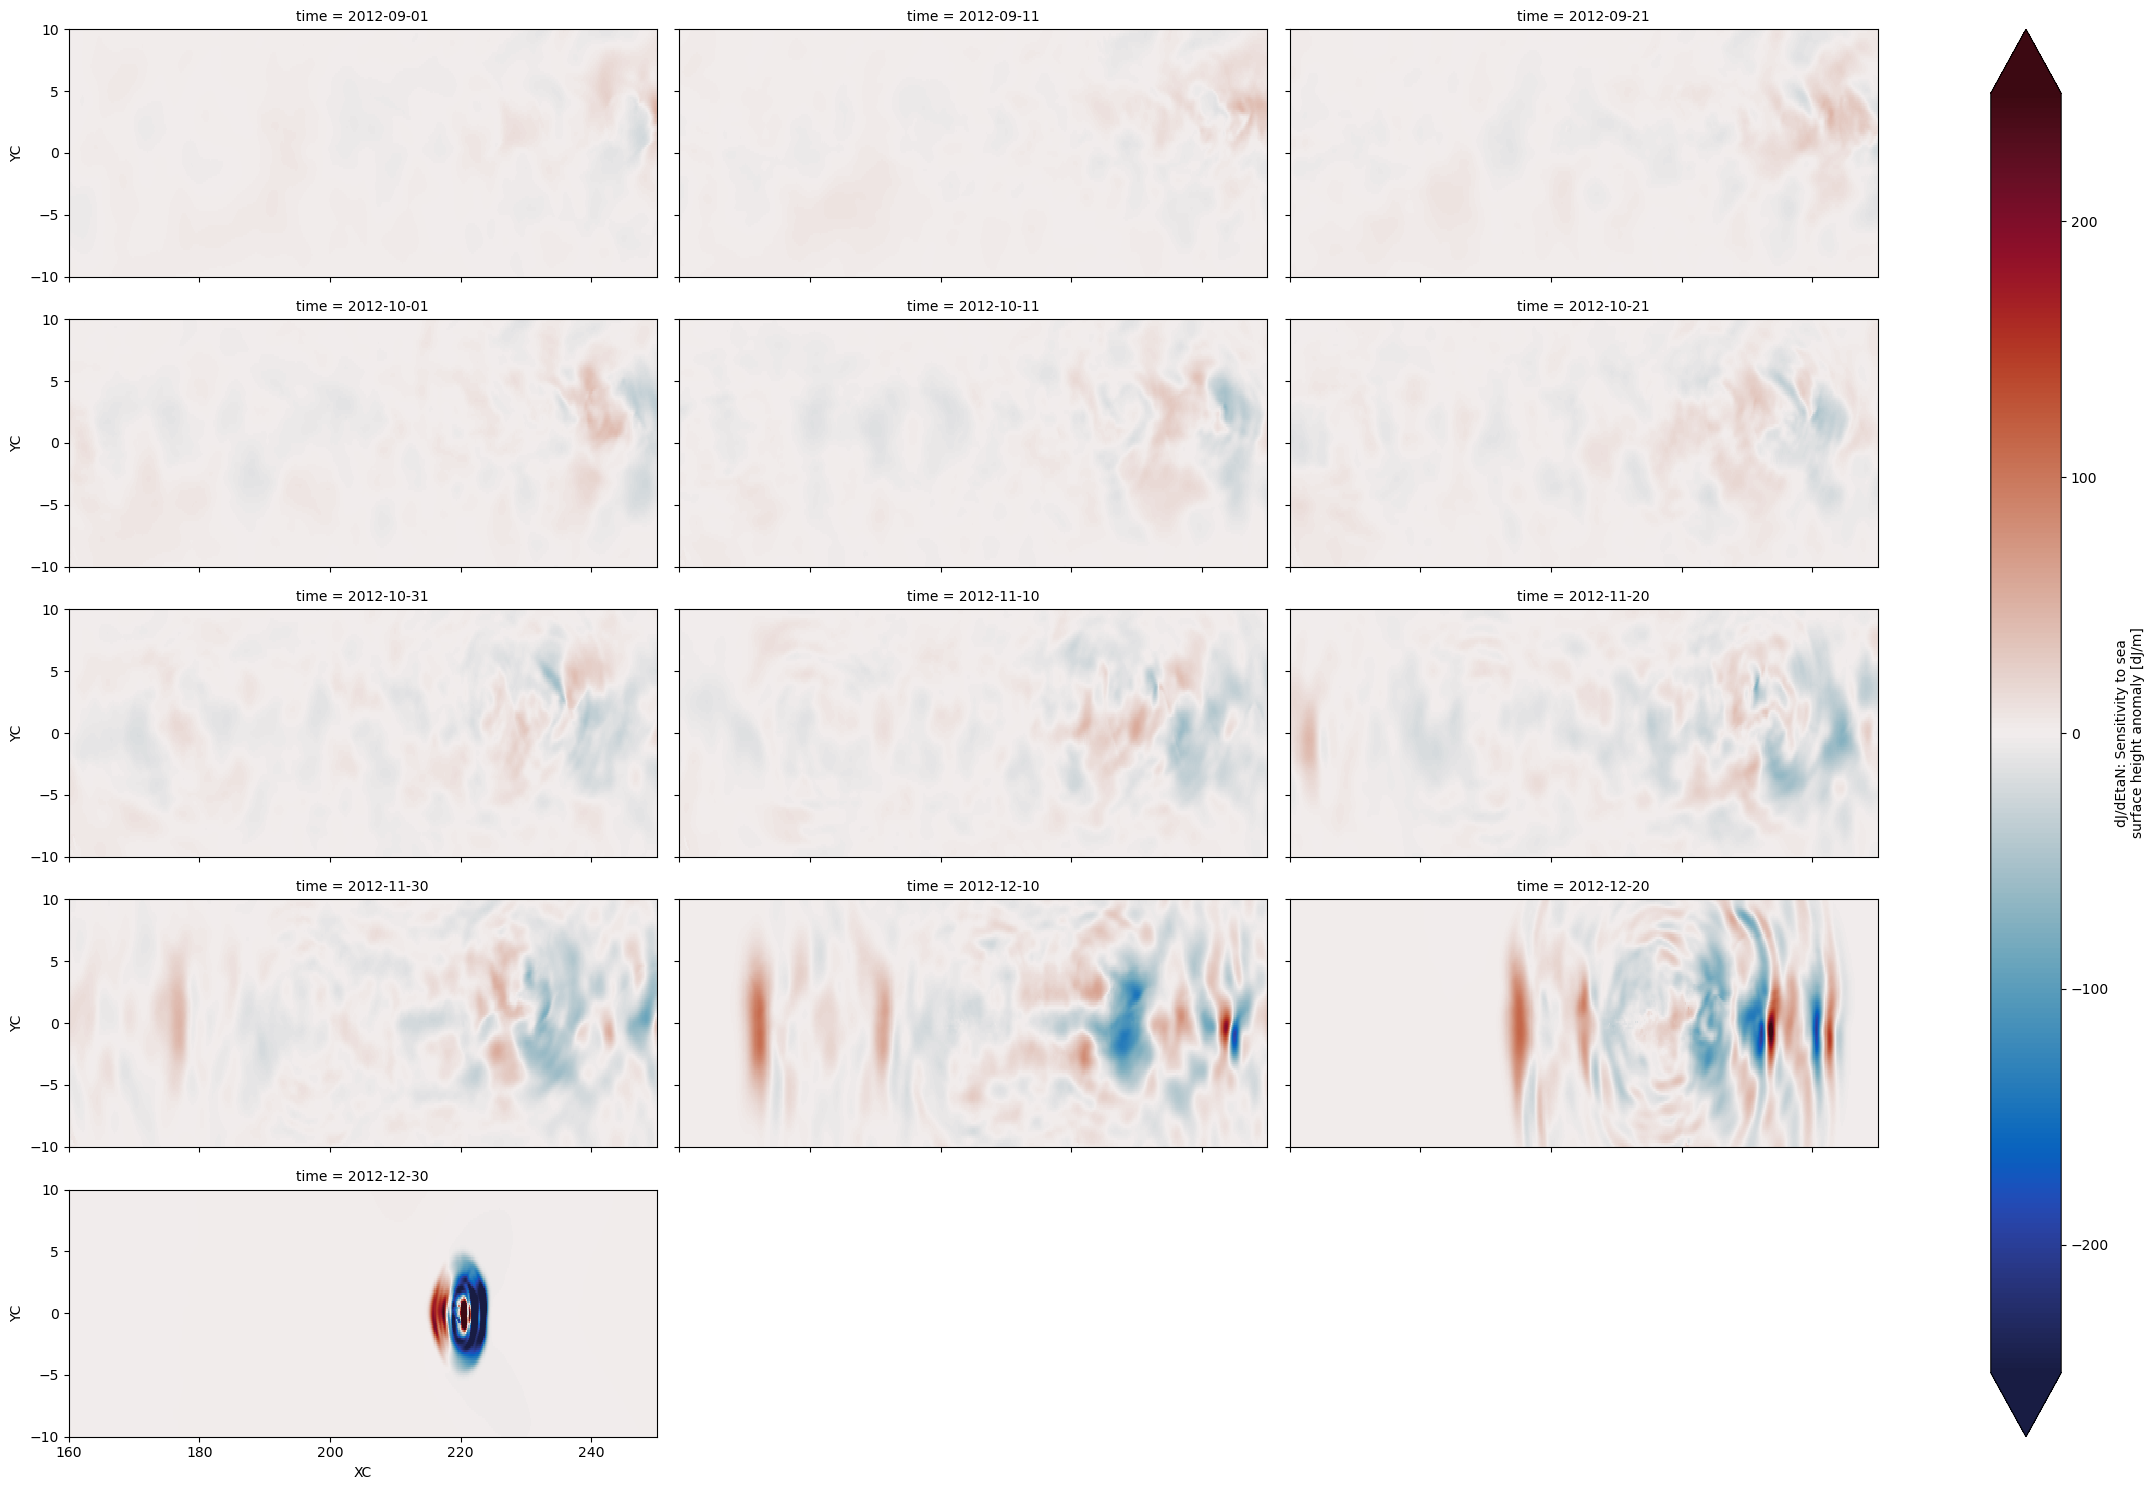

In [50]:
tpose_ds.ADJetan.sel(XC=slice(160,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-250, vmax=250,cmap=cmo.balance)

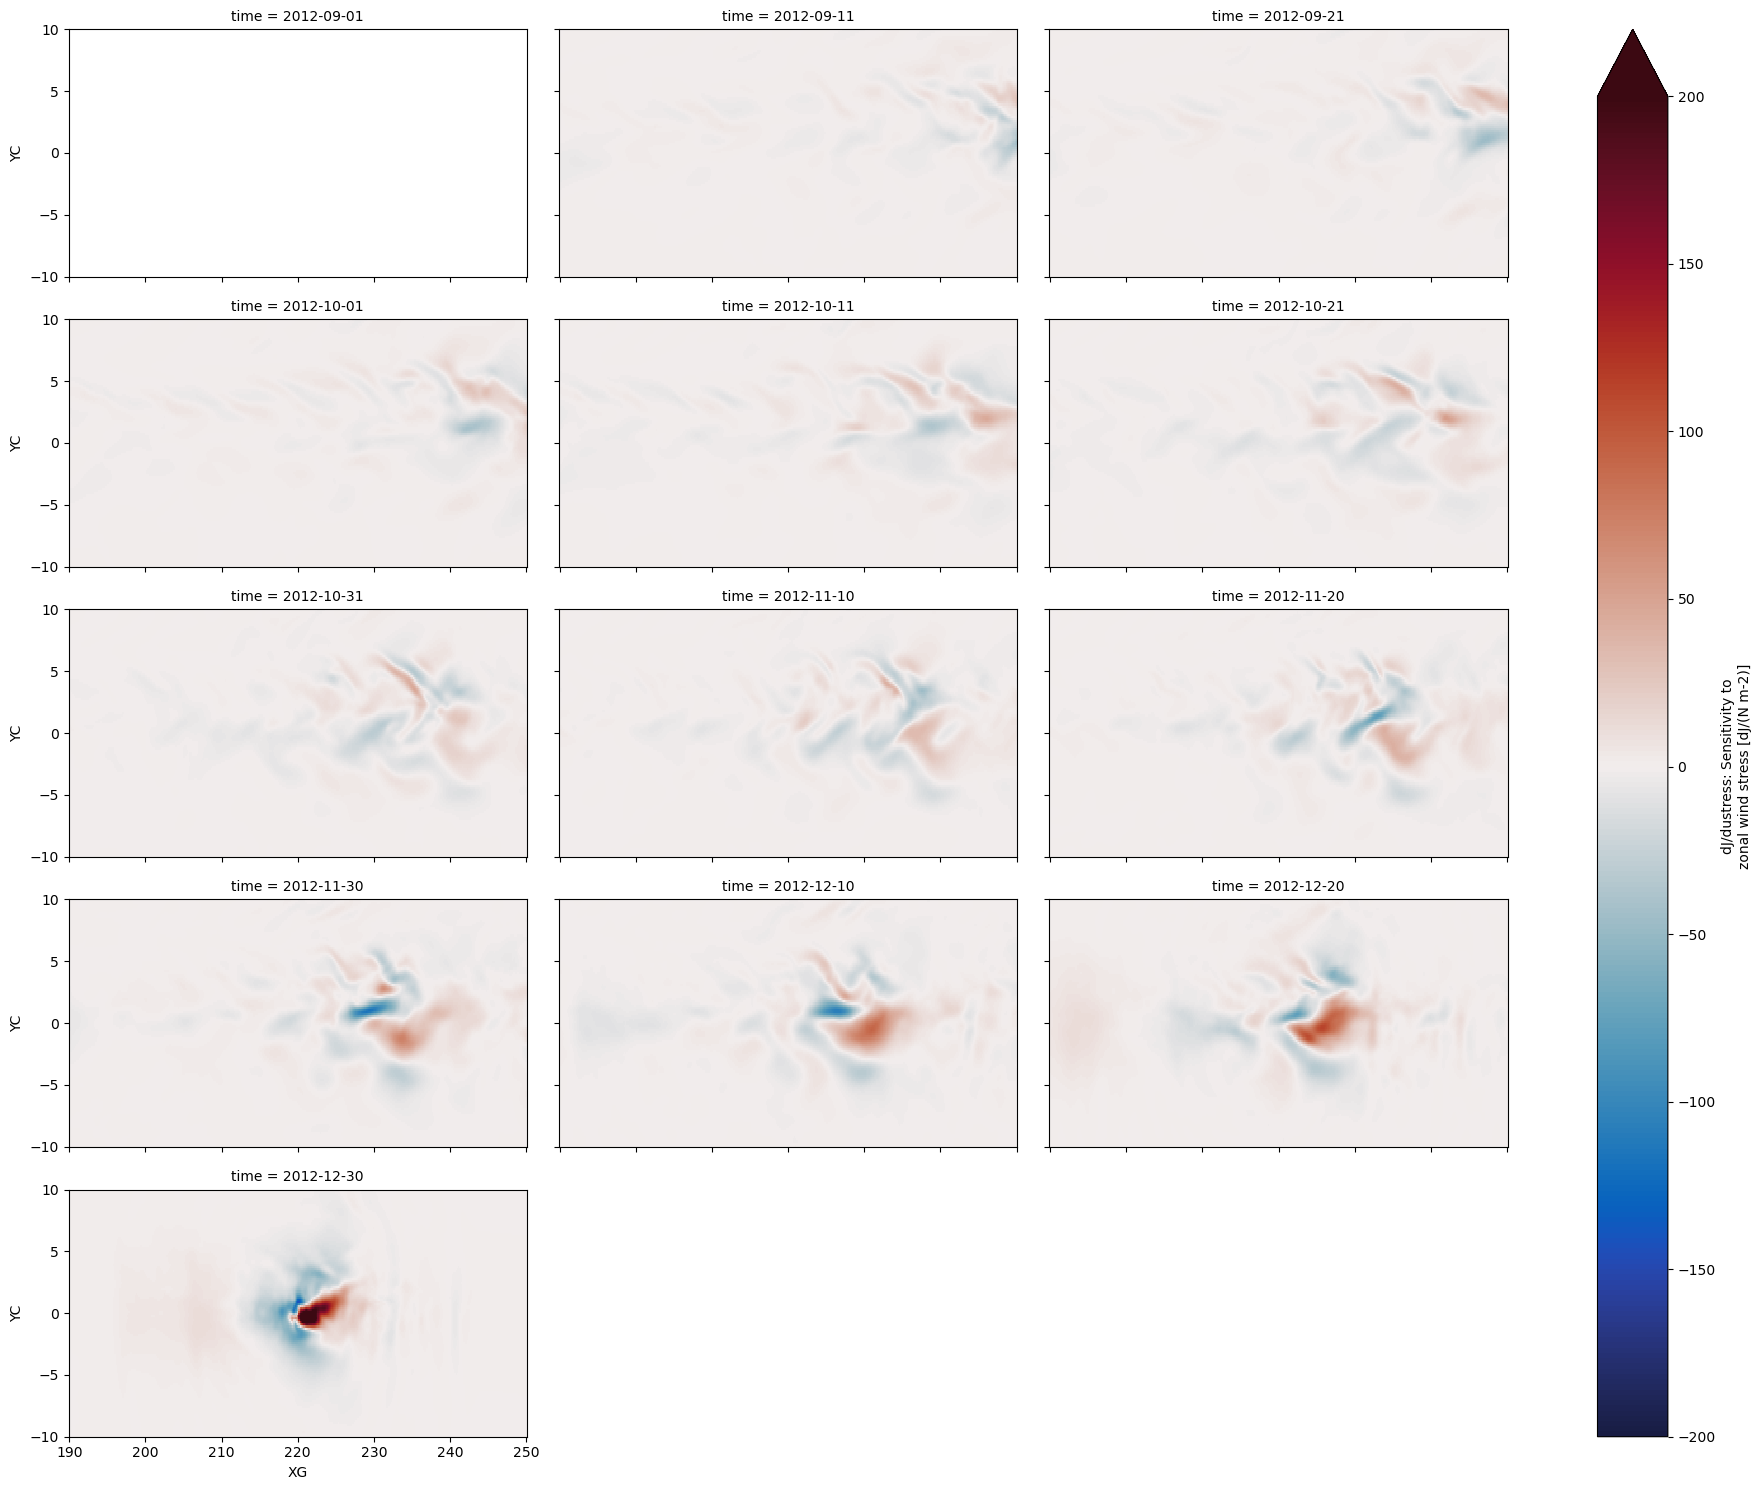

In [51]:
(tpose_ds.ADJustress.rolling(time=10).mean()).sel(XG=slice(190,250),YC=slice(-10,10))[::10].plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2,cmap=cmo.balance, vmin=-200,vmax=200)

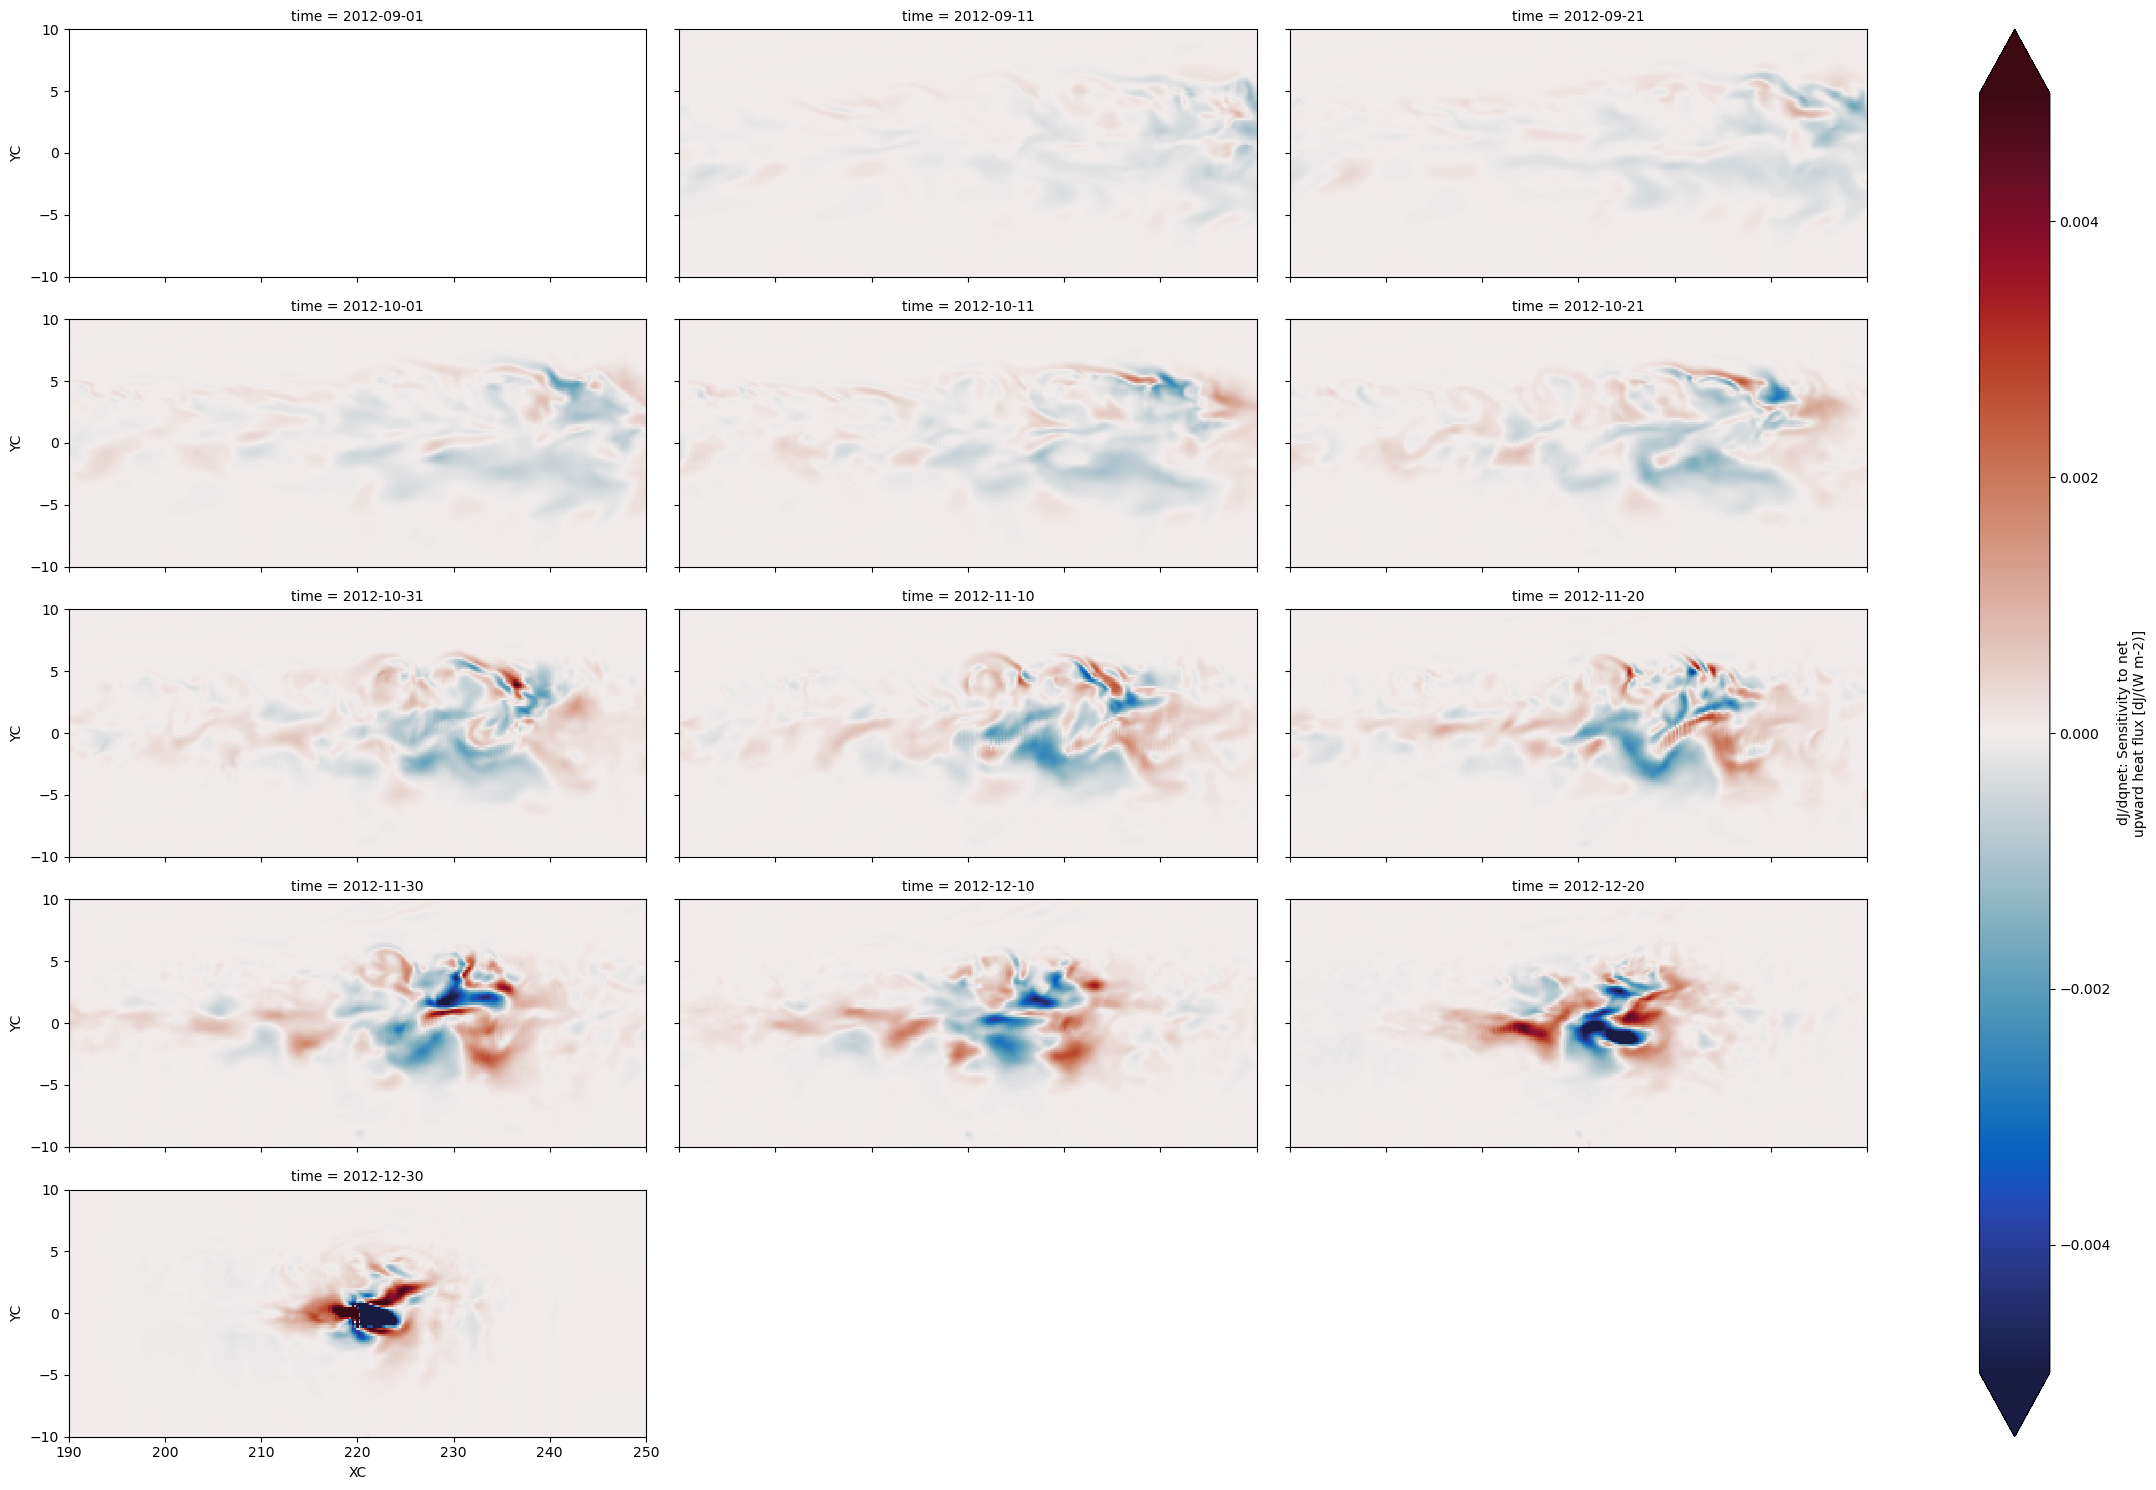

In [62]:
(tpose_ds.ADJqnet.rolling(time=10).mean()).sel(XC=slice(190,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5,cmap=cmo.balance, vmin=-0.005, vmax=0.005, robust=True)

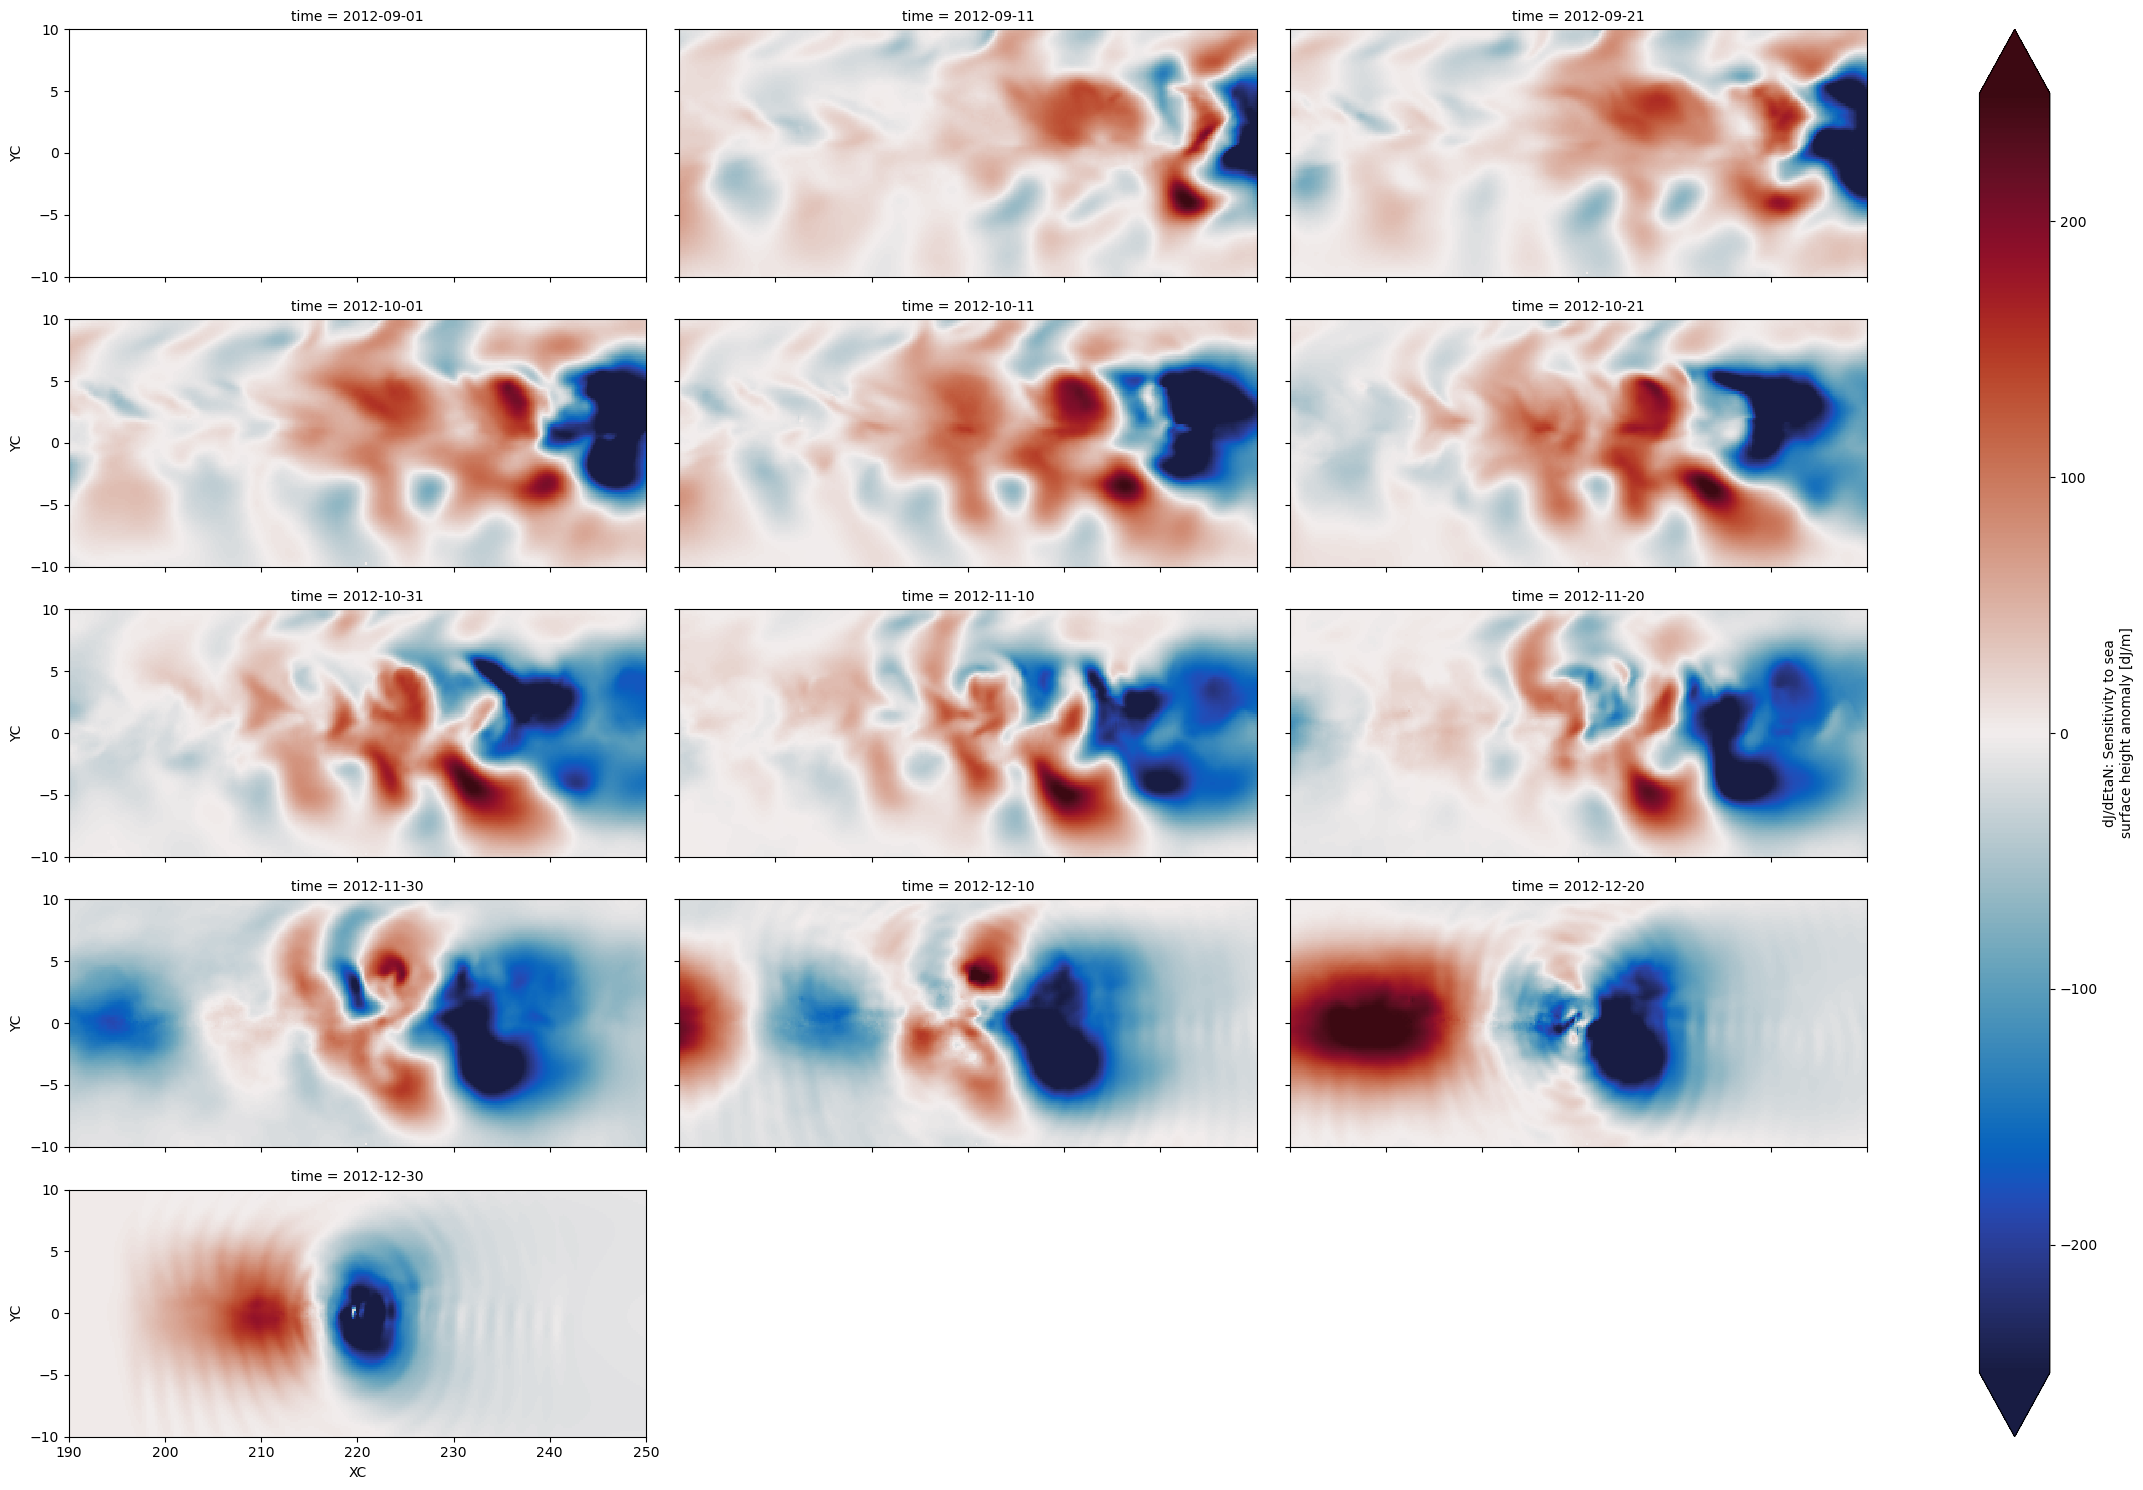

In [25]:
(tpose_ds.ADJetan.rolling(time=10).mean()).sel(XC=slice(190,250),YC=slice(-10,10))[::10].plot(x='XC', y='YC', col='time', col_wrap=3, aspect=2.5, vmin=-250,vmax=250, cmap=cmo.balance)

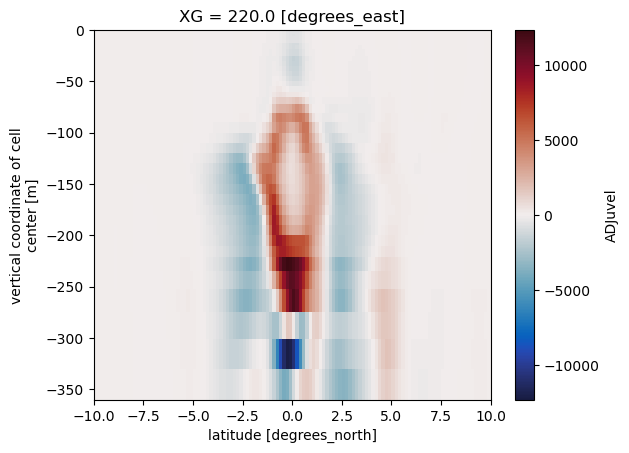

In [27]:
tpose_ds.ADJuvel[:,:40].mean(dim='time').sel(XG=[220.0],method='nearest').sel(YC=slice(-10,10)).plot(x='YC', y='Z', cmap=cmo.balance)

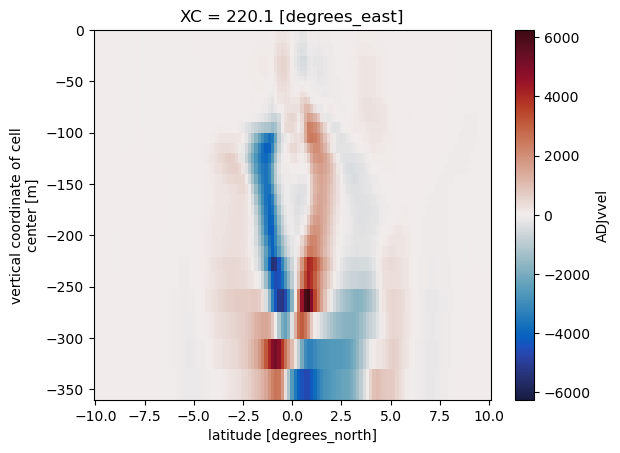

In [13]:
tpose_ds.ADJvvel[:,:40].mean(dim='time').sel(XC=[220.0],method='nearest').sel(YG=slice(-10,10)).plot(x='YG', y='Z', cmap=cmo.balance)

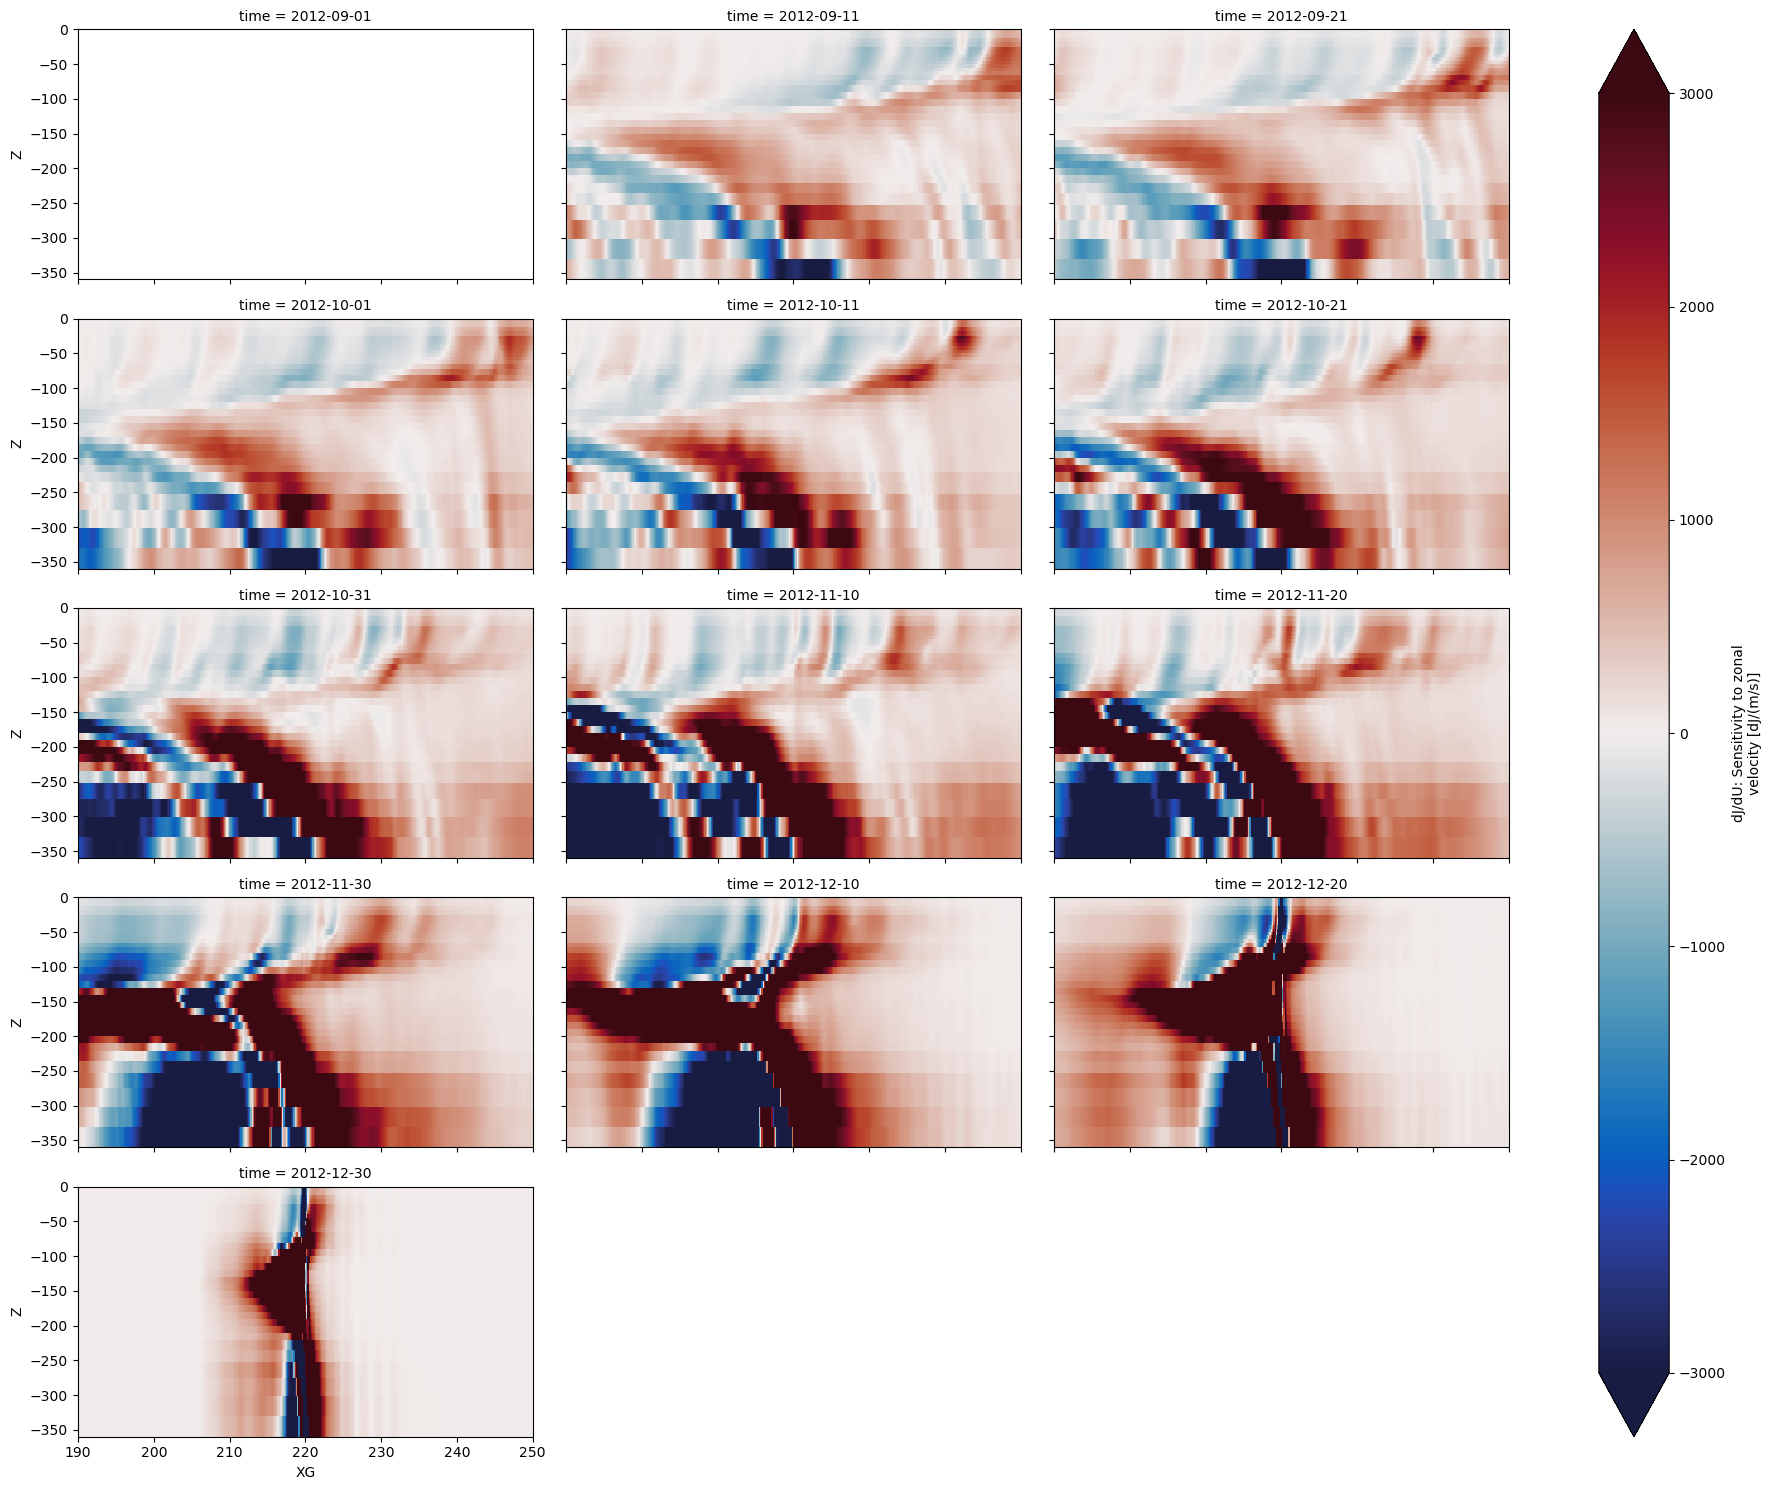

In [30]:
(tpose_ds.ADJuvel.rolling(time=5).mean())[::10,:40].sel(YC=[0.0],method='nearest').sel(XG=slice(190,250)).plot(x='XG', y='Z', col='time', col_wrap=3, aspect=2, vmin=-3000, vmax=3000,cmap=cmo.balance)

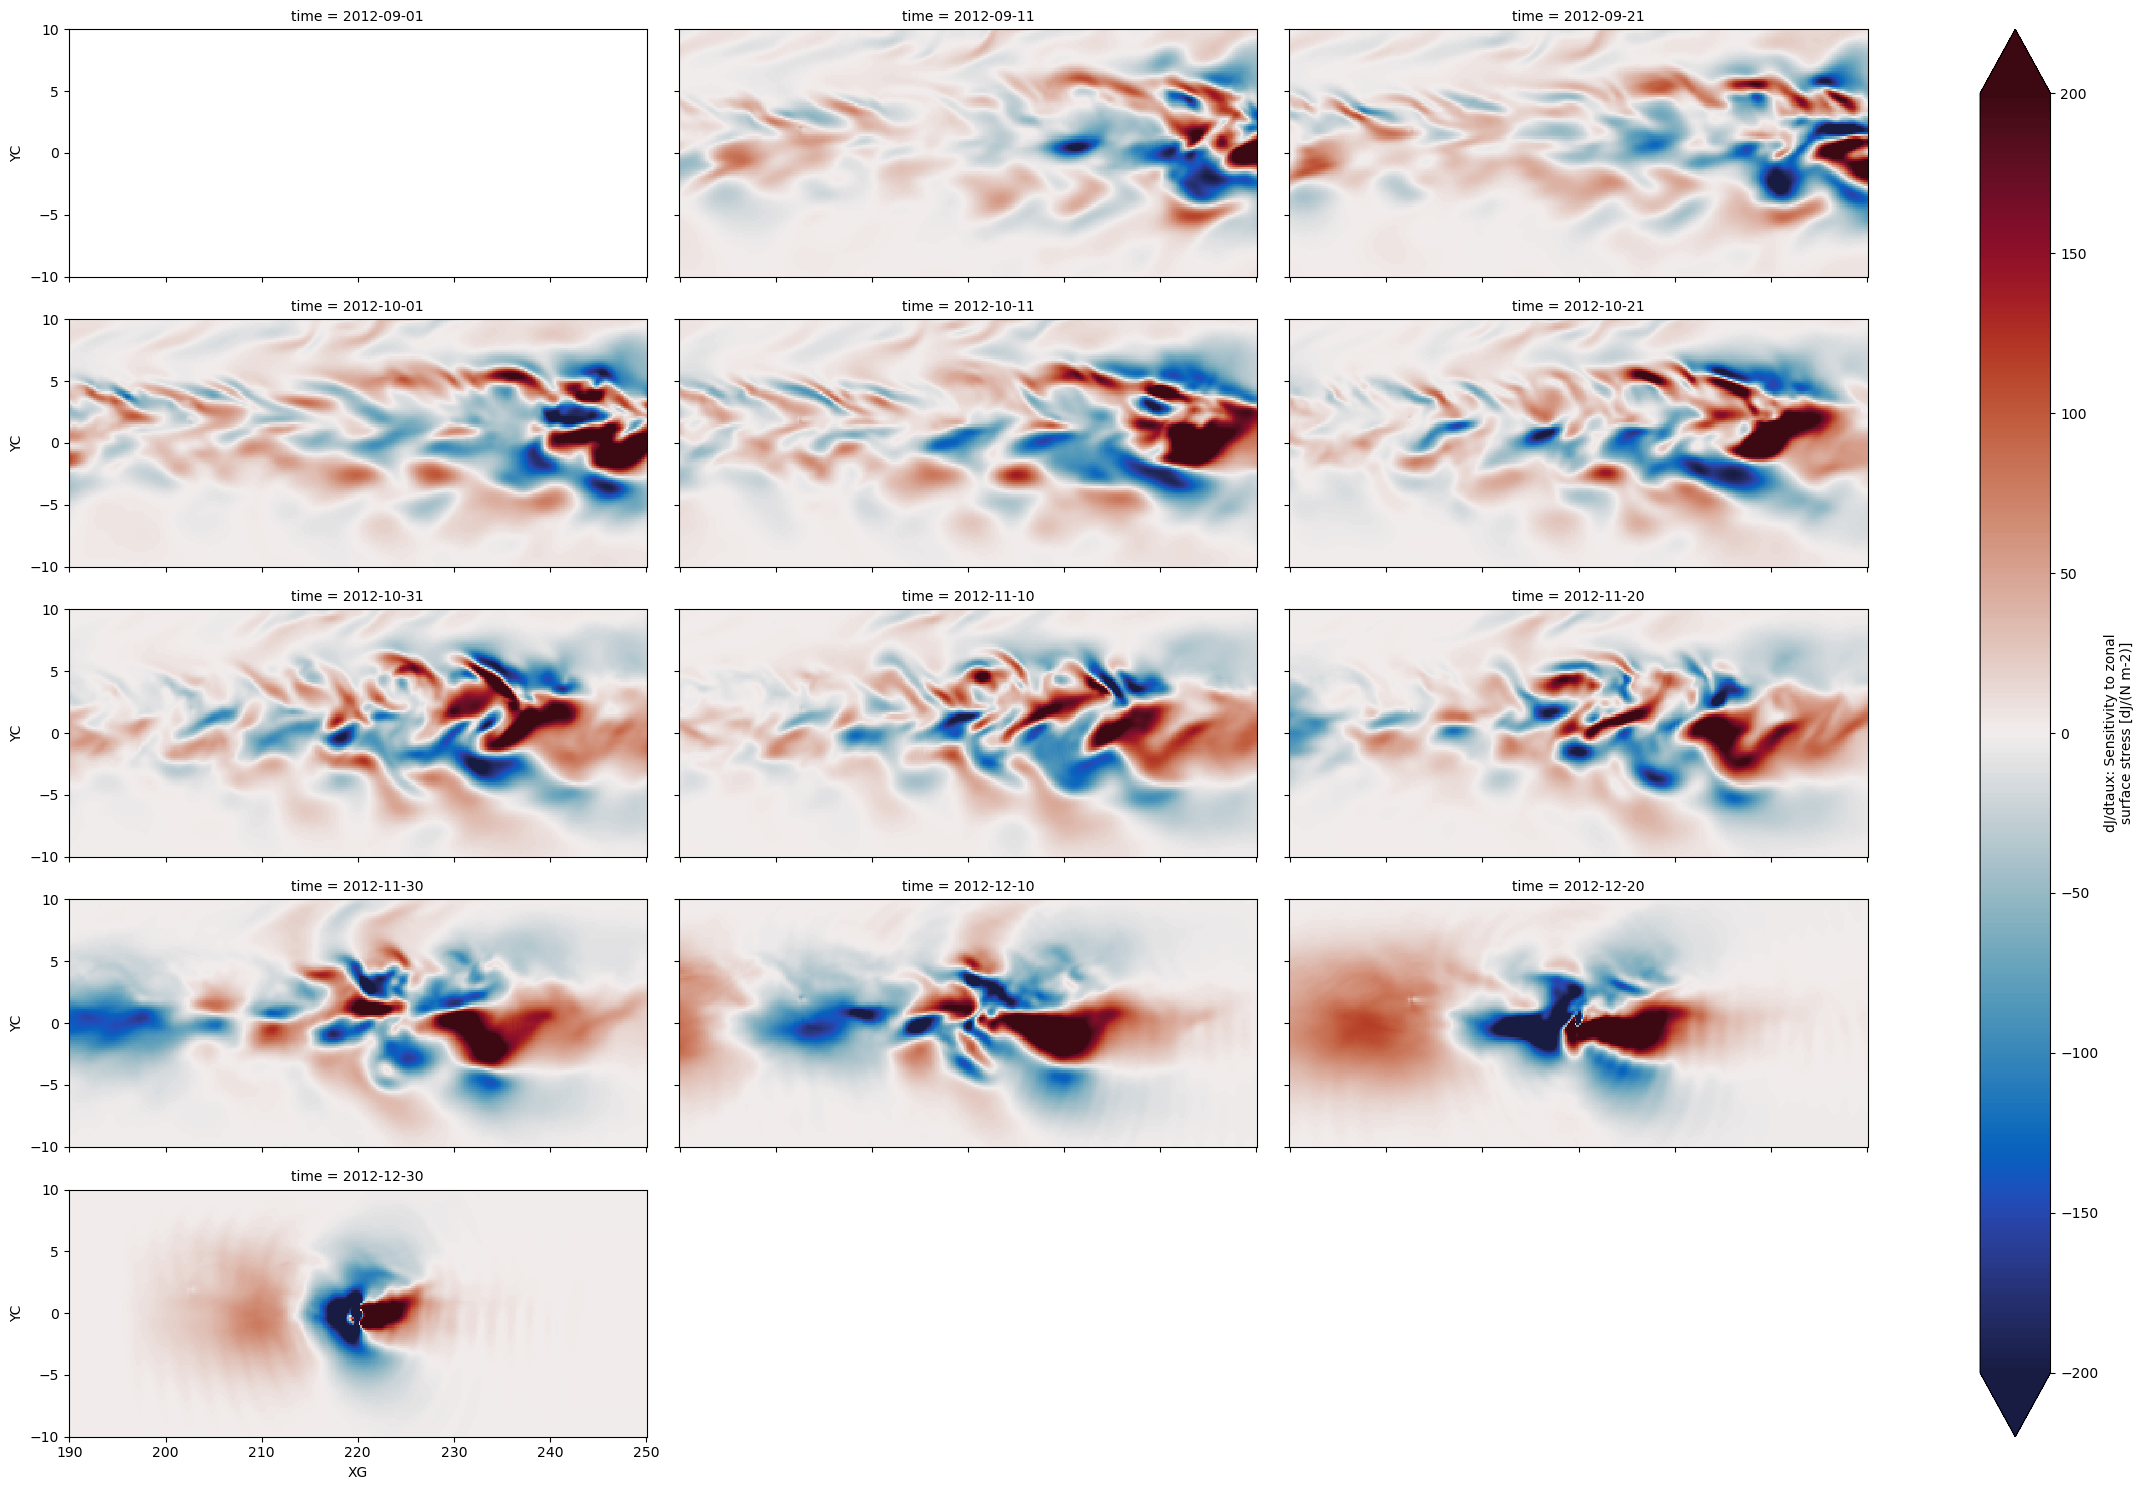

In [29]:
(tpose_ds.ADJtaux.rolling(time=10).mean())[::10].sel(XG=slice(190,250),YC=slice(-10,10)).plot(x='XG', y='YC', col='time', col_wrap=3, aspect=2.5,vmin=-200,vmax=200,cmap=cmo.balance)

In [ ]:
client.shutdown()

NameError: name 'client' is not defined